# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

**Путь к файлу:**

`/datasets/real_estate_data.csv`

**Загрузим библиотеки**

In [1]:
#импортируем библиотеку pandas, а также необходимые для дальнейшего анализа библиотеки и пакеты
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Загрузим данные из файла в датафрейм

In [2]:
#загрузим данные из файла в датафрейм
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

###  Изучим общую информацию о полученном датафрейме

**Выведем первые 10 строк датафрейма data на экран**

In [3]:
data.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


**Видим, что значения "склеились"** так как в качестве разделителя используется знак табуляции, а в команде на чтение файла это не было учтено.
Заново перечитаем файл, указав в качестве разделителя в параметре sep знак табуляции.

In [4]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

**Снова выведем первые 10 строк датафрейма data на экран**

In [5]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Выведем основную информацию о датафрейме с помощью метода ınfo**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Набор данных содержит сведения о 23699 объектах недвижимости, хранящиеся в 22 столбцах. 

**Построим общую гистограмму для всех числовых столбцов**

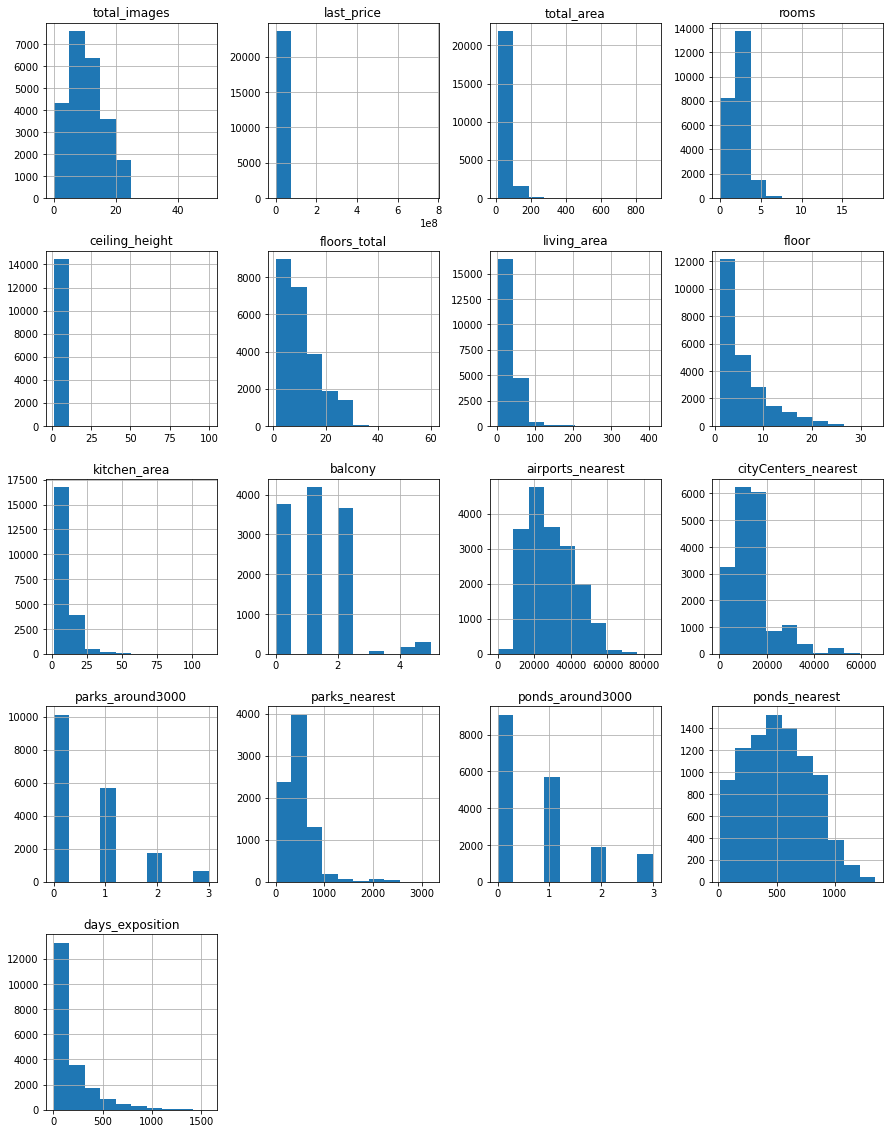

In [7]:
data.hist(figsize=(15,20));

In [8]:
# и посмотрим описание данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**По гистограммам и описанию данных можно предварительно отметить:**
- Для всех числовых столбцов отсутствуют отрицательные значения;
- Для некоторых параметров форма распределения не похожа на нормальное распределение или распределение Пуассона. Например для `last_price`, `total_area`, `rooms`, `ceiling_height`, `living_area`, `kitchen_area`.

## Предобработка данных

### Найдите и изучите пропущенные значения в столбцах

**Определим, в каких столбцах есть пропуски.** 

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Пропуски есть в 14 из 22 столбцов. Разберёмся с пропусками последовательно для каждого из столбцов.**

**для начала создадим функции, которые понадобятся нам в дальнейшем** 

***функция для вывода набора информации о конкретном столбце датафрейма***

In [10]:
def column_info (df, column):
    '''
    вывод информации о данных в столбце column датафрейма df
    '''
    print(f"Уникальные значения в столбце {column}: \n{df[column].unique()}")
    print()
    print(f"Распределение по количеству значений в столбце {column}: \n{df[column].value_counts()}")

    
    print(f"\nКоличество пустых значений в столбце {column}: {df[column].isna().sum()}")

***функция для построения гистограммы с количеством корзин равным количеству уникальных значений в столбце***

In [11]:
# функция для построения гистограммы с количеством корзин равным количеству уникальных значений в столбце
def hist_where_number_of_bins_equal_number_of_values (df, column):
     
    number_of_values=(len((df[column].value_counts())))
    df[column].hist(bins=number_of_values)

**Рассмотрим столбец `balcony`**

In [12]:
#используем ранее созданную функцию для вывода информации о столбце
column_info (data, 'balcony')

Уникальные значения в столбце balcony: 
[nan  2.  0.  1.  5.  4.  3.]

Распределение по количеству значений в столбце balcony: 
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Количество пустых значений в столбце balcony: 11519


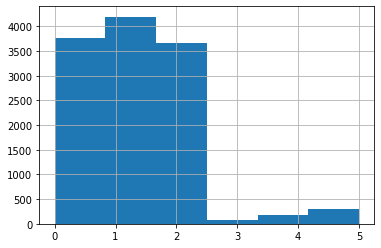

In [13]:
# строим гистограмму по столбцу с количеством корзин равным количеству уникальных значений в этом столбце
hist_where_number_of_bins_equal_number_of_values (data, 'balcony')

**Можно предположить**, что если продавец не указал количество балконов, то скорее всего в квартире их нет.

***Заполним пропущенные значения в столбце `balcony` значением 0.***

In [14]:
#заполним пропуски в столбце balcony значением 0
data['balcony'] = data['balcony'].fillna(0)

In [15]:
#Проверим, что не осталось пустых значений в столбце balcony
print(data['balcony'].isna().sum())

0


Text(0.5, 0, 'Balcony')

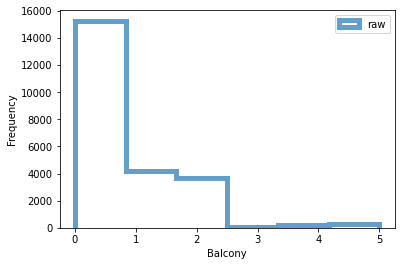

In [16]:
(data['balcony']
                .plot(
                    kind='hist',
                    bins=6,
                    histtype='step',
                    linewidth=5,
                    alpha=0.7,
                    label='raw',
                    legend=True,
                    figsize=(6,4))
) 
plt.xlabel("Balcony")

**Рассмотрим столбец `parks_around3000`**

In [17]:
# выведем информацию о данных в столбце parks_around3000
column_info (data, 'parks_around3000')

Уникальные значения в столбце parks_around3000: 
[ 1.  0.  2. nan  3.]

Распределение по количеству значений в столбце parks_around3000: 
0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Количество пустых значений в столбце parks_around3000: 5518


**Можно предположить, что если не заполнена информация о числе парков в радиусе 3 километров, то таких парков нет**

Дополнительно проверим условие, есть ли случаи, когда отсутствует информация о количестве парков в радиусе трех километров,
но при этом присутствует информация о количестве метров до ближайшего парка.

In [18]:
# Дополнительно проверим условие, есть ли случаи, когда отсутствует информация о количестве парков в радиусе трех километров,
# но при этом присутствует информация о количестве метров до ближайшего парка.

data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'].notna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Так как таких записей нет, то нет и противоречий с нашей гипотезой.

***Заполним пропущенные значения в столбце parks_around3000 значением 0.***

In [19]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [20]:
# проверяем, что не осталось пустых значений в колонке parks_around3000 
column_info(data, 'parks_around3000')

Уникальные значения в столбце parks_around3000: 
[1. 0. 2. 3.]

Распределение по количеству значений в столбце parks_around3000: 
0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Количество пустых значений в столбце parks_around3000: 0


**Аналогичные действия выполним для столбца `ponds_around3000`**

In [21]:
# выведем информацию о данных в столбце ponds_around3000
column_info (data, 'ponds_around3000')

Уникальные значения в столбце ponds_around3000: 
[ 2.  0.  3.  1. nan]

Распределение по количеству значений в столбце ponds_around3000: 
0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Количество пустых значений в столбце ponds_around3000: 5518


**Можно предположить, что если не заполнена информация о числе водоёмов в радиусе 3 километров, то таких водоёмов нет**

Дополнительно проверим условие, есть ли случаи, когда отсутствует информация о количестве водоёмов в радиусе трех километров,
но при этом присутствует информация о количестве метров до ближайшего водоёма.

In [22]:
# Дополнительно проверим условие, есть ли случаи, когда отсутствует информация о количестве водоёмов в радиусе трех километров,
# но при этом присутствует информация о количестве метров до ближайшего водоёма.

data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].notna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Так как таких записей нет, то нет и противоречий с нашей гипотезой.

***Заполним пропущенные значения в столбце ponds_around3000 значением 0.***

In [23]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [24]:
# проверяем, что не осталось пустых значений в колонке parks_around3000 
column_info(data, 'ponds_around3000')

Уникальные значения в столбце ponds_around3000: 
[2. 0. 3. 1.]

Распределение по количеству значений в столбце ponds_around3000: 
0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64

Количество пустых значений в столбце ponds_around3000: 0


**Рассмотрим столбец `floors_total`**

In [25]:
# выведем информацию о данных в столбце floors_total
column_info (data, 'floors_total')

Уникальные значения в столбце floors_total: 
[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. nan 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52.
 37.]

Распределение по количеству значений в столбце floors_total: 
5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

Количество пустых значений в столбце floors_total: 86


**Только 86 записей в датафрейме не имеют информацию о количестве этажей в доме**

Можно предположить, что собственники могли специально не указать этажность дома в случаях если их квартира находится на последнем этаже в доме.

Посмотрим какие значения этажа квартиры встречаются в выборке с пустыми значениями общего количества этажей в доме.

In [26]:
# выведем информацию о данных в столбце floor для среза данных с пустыми значениями floors_total
column_info (data[data['floors_total'].isna()], 'floor')
#data['floors_total'].describe()

Уникальные значения в столбце floor: 
[ 4  1 12  8  9 22 15  6  7  3 18 13 24 21 11  2  5 19 20 14 17 23 10]

Распределение по количеству значений в столбце floor: 
4     10
6      9
8      8
12     6
9      5
3      4
5      4
7      4
21     4
15     3
19     3
18     3
1      3
13     3
11     3
10     3
14     2
2      2
20     2
24     2
17     1
22     1
23     1
Name: floor, dtype: int64

Количество пустых значений в столбце floor: 0


In [27]:
data[data['floors_total'].isna()]['floor'].value_counts()

4     10
6      9
8      8
12     6
9      5
3      4
5      4
7      4
21     4
15     3
19     3
18     3
1      3
13     3
11     3
10     3
14     2
2      2
20     2
24     2
17     1
22     1
23     1
Name: floor, dtype: int64

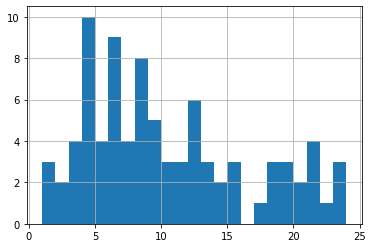

In [28]:
# построим гистограмму по столбцу floor в выборке с пустыми значениями общего количества этажей в доме
hist_where_number_of_bins_equal_number_of_values (data[data['floors_total'].isna()], 'floor')

Сложно сделать какой-либо вывод. Есть небольшие всплески для 4, 6, 8-го этажей, где пользователи не указали общее количество этажей, возможно скрывая, что этаж является последним.

***Оставим пустые значения в колонке `floors_total`, не будем пока их заполнять какими-либо значениями.***

**Рассмотрим столбец `is_apartment`**

In [29]:
column_info (data, 'is_apartment')

Уникальные значения в столбце is_apartment: 
[nan False True]

Распределение по количеству значений в столбце is_apartment: 
False    2725
True       50
Name: is_apartment, dtype: int64

Количество пустых значений в столбце is_apartment: 20924


Предположим, что если пользователь не установил признак принадлежности к апартаментам, то квартира не является апартаментами.

***Заполним пропущенные значения в столбце is_apartment значением False***

In [30]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [31]:
column_info (data, 'is_apartment')

Уникальные значения в столбце is_apartment: 
[False  True]

Распределение по количеству значений в столбце is_apartment: 
False    23649
True        50
Name: is_apartment, dtype: int64

Количество пустых значений в столбце is_apartment: 0


**Рассмотрим столбцы `kitchen_area` и `living_area`**

Посмотрим колонки общая площадь, жилая площадь и площадь кухни.

In [32]:
display(data[['total_area', 'living_area', 'kitchen_area']])

,total_area,living_area,kitchen_area
0,108.00,51.0,25.00
1,40.40,18.6,11.00
2,56.00,34.3,8.30
3,159.00,NaN,NaN
4,100.00,32.0,41.00
...,...,...,...
23694,133.81,73.3,13.83
23695,59.00,38.0,8.50
23696,56.70,29.7,NaN
23697,76.75,NaN,23.30


Можно рассмотреть два варианта работы с незаполненными значениями в столбцах kitchen_area и living_area:
   - 1 - оставить значения пустыми
   - 2 - посчитать сколько в среднем занимает площадь кухни и жилая площадь от общей площади квартиры и затем заполнить пропуски пропорционально.
   
   Сохраним копии исходных столбцов, добавив в датафрейм колонки kitchen_area_orig и living_area_orig, чтобы при необходимости иметь исходную информацию для анализа.
   Также добавим в датафрейм две колонки, в которых для каждой квартиры рассчитаем отношение площади кухни к общей площади и отношение жилой площади к общей площади.
   Затем заполним пропуски в столбцах, получая значения площади кухни и жилой площади с помощью умножения общей площади на медианное значение относительной площади кухни и жилой площади соответственно. 
    

In [33]:
#добавляем столбцы, в которых сохраним исходные данные
data['kitchen_area_orig'] = data['kitchen_area']
data['living_area_orig'] = data['living_area']

In [34]:
# добавим столбец с отношением площади кухни к общей площади
data['relative_kitchen_area'] = data['kitchen_area'] / data['total_area']

In [35]:
# также добавим столбец с отношением жилой площади к общей площади
data['relative_living_area'] = data['living_area'] / data['total_area']

Посмотрим относительную площадь кухни и относительную жилую площадь в зависимости от количества комнат.
Для этого создадим сводную таблицу, в которой посчитаем медианные значения относительной площади в разрезе количества комнат.

In [36]:
#делаем сводную таблицу с информацией о медианных значениях относительной площади кухни и жилой площади,
#в разрезе количества комнат

pivot_relative_area = data.pivot_table(index='rooms', values={'relative_kitchen_area', 'relative_living_area'},
                                       aggfunc='median')

In [37]:
#смотрим, что получилось
print(pivot_relative_area)

       relative_kitchen_area  relative_living_area
rooms                                             
0                        NaN              0.689655
1                   0.247839              0.482488
2                   0.161075              0.585009
3                   0.128571              0.631667
4                   0.112245              0.659740
5                   0.105386              0.651842
6                   0.099502              0.679412
7                   0.083717              0.681670
8                   0.109170              0.688475
9                   0.049620              0.628251
10                  0.091624              0.653103
11                  0.066855              0.710093
12                  0.124444              0.455222
14                  0.075636              0.648695
15                  0.169492              0.693220
16                  0.048148              0.666667
19                  0.073679              0.706086


- для квартир, у которых ноль комнат, в колонке с медианным относительным значением площади кухни получилось значение Nan. Значит, ни для одной из таких квартир не указана площадь кухни, и можно сделать вывод, что в квартирах с количеством комнат равным нулю не выделена отдельная кухня. Поэтому для них можно заполнить площадь кухни значением 0.
- для остальных квартир, у которых количество комнат больше нуля, заполним значение площади кухни умножив общую площадь на медианное значение относительной площади кухни в соответствии с количеством комнат.
- жилую площадь также заполним умножив общую площадь на медианное значение относительной жилой площади в зависимости от количества комнат.

In [38]:
#заполним значением 0 площадь кухни для квартир с количеством комнат равным 0
data.loc[(data['kitchen_area'].isna()) & (data['rooms']==0), 'kitchen_area'] = data['kitchen_area'].fillna(0)

Если количество комнат равняется нулю и кухня отсутствует, то поставим признак, что объект является студией.

In [39]:
#ставим признак, что объект является студией
data.loc[(data['rooms']==0) & (data['kitchen_area']==0) & (data['studio']==False), 'studio'] = data[(data['rooms']==0) & (data['kitchen_area']==0) & (data['studio']==False)]['studio']=True

Если количество комнат равняется 1, кухня отсутствует, и при этом стоит признак, что объект является студией, то установим количество комнат равным нулю.  То есть считаем, что в студиях количество комнат должно быть равным 0.

In [40]:
data.loc[(data['rooms']==1) & (data['kitchen_area'].isna()) & (data['studio']==True), 'rooms'] = data[(data['rooms']==1) & (data['kitchen_area'].isna()) & (data['studio']==True)]['rooms']=0

In [41]:
data.loc[(data['rooms']==1) & (data['studio']==True)]['kitchen_area']

Series([], Name: kitchen_area, dtype: float64)

Заполним пропуски в колонках `kitchen_area` и `living_area` медианными значениями по типу столбца `rooms`

In [42]:
for r in data['rooms'].unique():
    data.loc[(data['rooms'] == r) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == r), 'kitchen_area'].median()

In [43]:
for r in data['rooms'].unique():
    data.loc[(data['rooms'] == r) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == r), 'living_area'].median()

Проверим, что не осталось пустых значений в столбцах `kitchen_area` и `living_area`

In [44]:
#проверяем, что не осталось пустых значений в столбцах 
print(data['kitchen_area'].isna().sum())
print(data['living_area'].isna().sum())

0
0


In [45]:
#удалим ранее созданные вспомогательные колонки
data = data.drop(['relative_kitchen_area', 'relative_living_area'], axis=1)

Не будем заполнять оставшиеся пропуски в следующих ячейках с картографическими данными, так сложно определить на основе каких признаков можно было бы определить их значения: **airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest**

Также оставим без заполнения пропуски в колонках: **ceiling_height, floors_total, locality_name, days_exposition**


#### Возможные причины пропусков в данных

**К пропускам в данных могли привести следующие причины:**
- отсутствие информации в автоматизированных системах, из которых производилось обогащение данными, например, для картографической информации: расстояние до центра города, расстояние до аэропорта и т.п.
- отстутствие информации у пользователя, например о высоте потолка или площади кухни, и необязательность заполнения данных полей в формах ввода.
- возможно преднамеренное непредоставление информации собственником, например, об общем количестве этажей в доме, если квартира находится на последнем этаже и при этом не относится к элитному жилью.

### Рассмотрите типы данных в столбцах

In [46]:
# еще раз посмотрим на информацию о датафрейме и типы данных в каждом столце
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***поменяем тип данных у столбцов:***

- для столбца `'first_day_exposition'` поменяем тип данных на data, чтобы иметь возможность совершать операции с датами 
- для столбцов значения которых по смыслу измеряются в целых числах, поменяем тип данных на ınt


   Столбец               |Текущий тип данных|Комментарий    
   :-----                |:--------:        |----
   total_images          | int64            | 
   last_price            | float64          |
   total_area            | float64          |
   first_day_exposition  | object           |меняем на data
   rooms                 | int64            |
   ceiling_height        | float64          |
   floors_total          | float64          |меняем на int
   living_area           | float64          |
   floor                 | int64            |
   is_apartment          | bool             |
   studio                | bool             |
   open_plan             | bool             |
   kitchen_area          | float64          |
   balcony               | float64          |меняем на int
   locality_name         | object           |
   airports_nearest      | float64          |меняем на int
   cityCenters_nearest   | float64          |меняем на int
   parks_around3000      | float64          |меняем на int
   parks_nearest         | float64          |меняем на int
   ponds_around3000      | float64          |меняем на int
   ponds_nearest         | float64          |меняем на int
   days_exposition       | float64          |меняем на int

In [47]:
#преобразовываем столбец first_day_exposition из строк в даты 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [48]:
#заменим вещественный тип данных на целочисленный

data[['balcony','parks_around3000','ponds_around3000']] = data[['balcony','parks_around3000','ponds_around3000']].astype(int)

In [49]:
#продолжим заменять вещественный тип на целочисленный
#для колонок где встречаются пустые значения указываем параметр astype('Int64')
data[['floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest','ponds_nearest']] = data[['floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']].astype('Int64')

In [50]:
#продолжим заменять вещественный тип на целочисленный
#для колонки days_exposition сначала округляем значение до целого и затем преобразовываем
data['days_exposition'] = data['days_exposition'].round().astype('Int64')

In [51]:
#проверим типы данных в столбцах после изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Почему поменяли тип данных**

- в столбце `first_day_exposition` перевели строки в даты, чтобы в дальнейшем иметь возможность применять к данным столбца методы работы с датой и временем.
- в столбцах где по смыслу находятся целочисленные данные, поменяли тип данных на int.

### Устраните неявные дубликаты в столбце с названиями населённых пунктов

In [52]:
#проверим наличие явных дубликатов в датафрейме
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

Посмотрим уникальные значения в столбце `locality_name` на наличие неявных дубликатов: 

In [53]:
#сначала определим количество уникальных названий
len(data['locality_name'].unique())

365

In [54]:
#смотрим уникальные значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Уберём из названий типы населённых пунктов и удалим пробелы:

In [55]:
#удаляем из названий типы населённых пунктов
data['locality_name'] = (data['locality_name']
    .replace('посёлок|поселок|село|городского|типа|деревня|коттеджный|\
    |городской|станции|товарищество|садовое|садоводческое|при|железнодорожной|имени|некоммерческое|" "',
                                                      '', regex=True)
                        .str.strip())

In [56]:
#смотрим, что получилось
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [57]:
#смотрим сколько осталось уникальных названий
len(data['locality_name'].unique())

306

После удаления неявных дубликатов количество наименований населённых пунктов уменьшилось с 365 до 306.

### Найдите и устраните редкие и выбивающиеся значения

**Проверим столбец `celing_height` на предмет редких и выбивающихся значений**

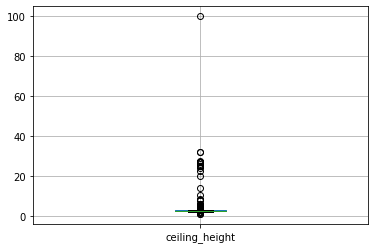

In [58]:
#смотрим диаграмму размаха
data.boxplot('ceiling_height');

In [59]:
#посмотрим характеристики данных
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

По диаграмме размаха видно, что есть единичное значение равное 100 метрам, 
а также выбивающиеся значения в дипазонах от 20 до 35 метров, и в диапазоне от 3 до 10 метров

***Для значений от 20 до 35 метров можно предположить, что реальные значения должны быть в 10 раз меньше.***

Заменим для таких строк высоту потолка, разделив её на 10.

In [60]:
data.loc[(data['ceiling_height'] > 20) & (data['ceiling_height'] <35), 'ceiling_height'] \
   = data[(data['ceiling_height'] > 20) & (data['ceiling_height'] <35)]['ceiling_height'] / 10

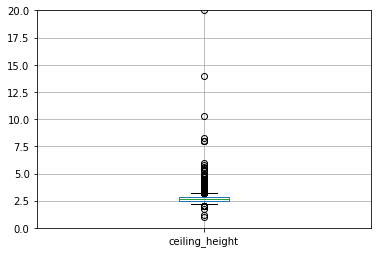

In [61]:
# теперь посмотрим диаграмму размаха в дипазаоне значений высоты потолка от 0 до 20 метров
plt.ylim(0,20)
data.boxplot('ceiling_height');

Предположим, что значения больше 7 метров и менее 2 метров являются неправдоподобными и заменим эти значения в столбце `ceiling_height` на неопределенное значение NaN

In [62]:
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 7), 'ceiling_height'] = np.nan

**Проверим столбец `total_images` на предмет редких и выбивающихся значений**

In [63]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=int64)

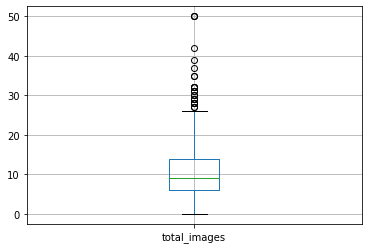

In [64]:
data.boxplot('total_images');

In [65]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Количество фотографий в основном состаляет от 6 до 14. 

Минимальное значение - 0 фотографий, и максимальное - 50, не являются аномальными, поэтому ничего не делаем с этим столбцом.

**Проверим столбец `last_price` на предмет редких и выбивающихся значений**

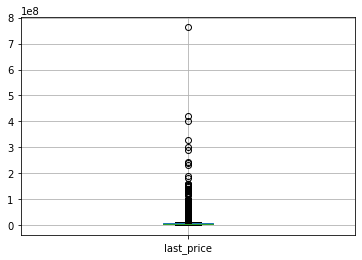

In [66]:
#смотрим диаграмму размаха
data.boxplot('last_price');

Для удобства разделим цены на 1 000 000, чтобы измерять их в миллионах рублей.

In [67]:
data['last_price'] = data['last_price'] / 1000000

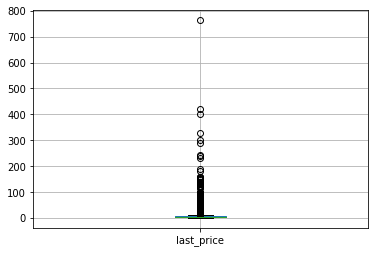

In [68]:
#ещё раз смотрим диаграмму размаха, цены в млн.рублей
data.boxplot('last_price');

In [69]:
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Основной разброс цен находится в диапазоне от 3.4 до 6.8 млн. рублей.

Есть большое количество объектов с ценами значительно превышающими средние, и некоторые объекты на два порядка превышающие средние цены. 

Найдем квартиры с самыми большими ценами.
Отсортируем таблицу по убыванию цен и выведем первые 10 строк.

In [70]:
#выводим информацию о 10 самых дорогих квартирах
display(data.sort_values(by='last_price', ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_orig,living_area_orig
12971,19,763.0000,400.0,2017-09-30,7,NaN,10,250.0,10,False,...,Санкт-Петербург,25108,3956,1,530,3,756,33,NaN,250.0
19540,8,420.0000,900.0,2017-12-06,12,2.80,25,409.7,25,False,...,Санкт-Петербург,30706,7877,0,<NA>,2,318,106,112.0,409.7
14706,15,401.3000,401.0,2016-02-20,5,NaN,9,204.0,9,False,...,Санкт-Петербург,21912,2389,1,545,1,478,393,24.0,204.0
1436,19,330.0000,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,Санкт-Петербург,23011,1197,3,519,3,285,233,40.0,95.0
15651,20,300.0000,618.0,2017-12-18,7,3.40,7,258.0,5,False,...,Санкт-Петербург,32440,5297,0,<NA>,2,198,111,70.0,258.0
22831,18,289.2384,187.5,2019-03-19,2,3.37,6,63.7,6,False,...,Санкт-Петербург,22494,1073,3,386,3,188,<NA>,30.2,63.7
16461,17,245.0000,285.7,2017-04-10,6,3.35,7,182.8,4,False,...,Санкт-Петербург,33143,6235,3,400,3,140,249,29.8,182.8
13749,7,240.0000,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,Санкт-Петербург,32440,5297,0,<NA>,2,198,199,40.0,218.0
5893,3,230.0000,500.0,2017-05-31,6,NaN,7,123.9,7,False,...,Санкт-Петербург,32440,5297,0,<NA>,2,198,50,40.0,NaN
8900,13,190.8700,268.0,2016-03-25,3,NaN,8,132.0,7,False,...,Санкт-Петербург,32440,5297,0,<NA>,2,198,901,40.0,132.0


Все самые дорогие квартиры находятся в Санкт-Петербурге.

Ограничим диапазон для диаграммы размаха максимальным значением в 50 млн. рублей.

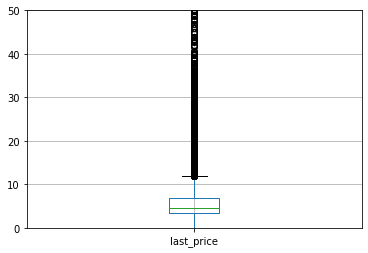

In [71]:
plt.ylim(0,50)
data.boxplot('last_price');

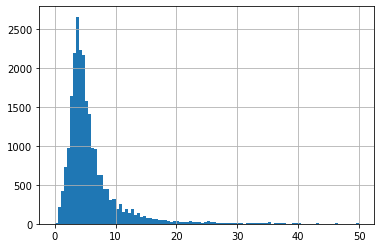

In [72]:
data['last_price'].hist(range=(0,50), bins=100);

Цены более 20 млн. уже редки, а более 40 млн становятся единичными.

Посчитаем, сколько квартир стоят больше 40 млн и в каких городах они находятся.

In [73]:
len(data[data['last_price']>40])

182

In [74]:
data[data['last_price']>40].groupby('locality_name')['last_price'].count()

locality_name
Пушкин               1
Санкт-Петербург    181
Name: last_price, dtype: int64

Всего 182 квартиры стоят больше 40 млн. и все они за исключением одной находятся в Санкт-Петербурге.
Возможно сегмент дорогой недвижимости лучше анализировать отдельно.


Поэтому **сохраним квартиры стоимостью более 40 млн.рублей в отдельном датасете и уберём из основного анализа**

In [75]:
#создаем датасет good_data в котором оставляем недвижимость стоимостью менее 40 млн.рублей
good_data = data.query('last_price <= 40')

**Проверим столбец `total_area` на предмет редких и выбивающихся значений**

In [76]:
good_data['total_area'].describe()

count    23517.000000
mean        58.938383
std         30.059807
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64

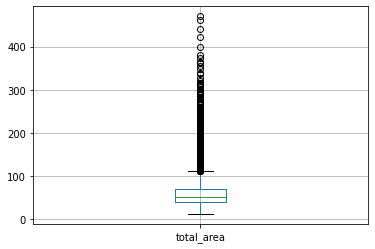

In [77]:
good_data.boxplot('total_area');

In [78]:
display(good_data.sort_values(by='total_area', ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_orig,living_area_orig
6221,8,34.000000,470.30,2018-01-14,4,NaN,3,248.700,3,False,...,Санкт-Петербург,43756,15459,1,852,3,122,179,40.00,248.7
20273,12,20.000000,460.80,2019-03-20,6,3.10,3,279.600,1,False,...,Санкт-Петербург,43756,15459,1,852,3,122,21,55.50,279.6
3676,12,28.789000,441.98,2019-01-23,4,NaN,6,63.600,6,False,...,Санкт-Петербург,20552,5181,0,<NA>,0,<NA>,<NA>,35.05,NaN
22131,14,27.000000,422.20,2018-10-18,5,2.70,13,91.785,11,False,...,Санкт-Петербург,46625,16554,0,<NA>,0,<NA>,<NA>,NaN,NaN
5873,0,38.000000,400.00,2019-03-15,7,3.60,3,145.000,1,False,...,Санкт-Петербург,24889,5457,1,271,0,<NA>,<NA>,NaN,NaN
5042,20,35.000000,380.00,2017-08-17,6,NaN,3,198.000,2,False,...,Пушкин,18490,30643,1,527,1,668,15,50.00,198.0
14498,6,32.250000,374.60,2018-06-09,19,NaN,5,264.500,2,False,...,Санкт-Петербург,19497,3574,0,<NA>,2,548,114,27.60,264.5
19961,20,32.350000,365.00,2016-10-10,5,3.20,3,101.000,3,False,...,Санкт-Петербург,38808,13706,0,<NA>,0,<NA>,<NA>,37.00,101.0
10684,6,32.894076,364.70,2019-05-02,7,3.32,3,145.000,1,False,...,Санкт-Петербург,<NA>,<NA>,0,<NA>,0,<NA>,<NA>,NaN,NaN
866,5,25.000000,363.00,2017-12-23,14,3.16,5,222.000,4,False,...,Санкт-Петербург,38076,7950,0,<NA>,2,435,418,16.60,222.0


Минимальная площадь 12 м$^2$, максимальная - 470 м$^2$.

In [79]:
good_data[good_data['total_area'] > 250]['total_area'].count()

48

Квартиры общей площадью более 250 м$^2$ встречаются редко, возможно их следует относить к сегменту премиального класса и анализировать отдельно. Исключим из нашего датасета объекты общей площадью более 250 м$^2$.

In [80]:
good_data = good_data.query('total_area <= 250')

**Посмотрим столбец `first_day_exposition`**

Выведем минимальную и максимальную дату:

In [81]:
print(f"""Минимальная дата публикации  {good_data['first_day_exposition'].min()}
Максимальная дата публикации {good_data['first_day_exposition'].max()}""")

Минимальная дата публикации  2014-11-27 00:00:00
Максимальная дата публикации 2019-05-03 00:00:00


Данные содержат период публикации объявлений примерно в 4 с половиной года.

**Проверим столбец `rooms` на предмет редких и выбивающихся значений**

In [82]:
good_data['rooms'].value_counts()

1     8034
2     7930
3     5762
4     1131
5      277
0      207
6       79
7       35
8        7
9        3
11       2
10       1
14       1
Name: rooms, dtype: int64

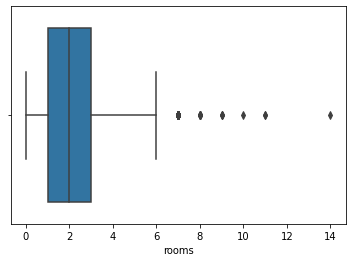

In [83]:
sns.boxplot(data=good_data, x='rooms');

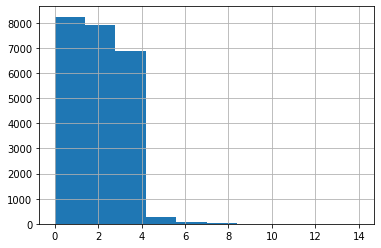

In [84]:
good_data['rooms'].hist();

Квартиры с количеством комнат более 7 практически не встречаются в данных. Удалим из анализа объекты, в которых более 7 комнат.

In [85]:
good_data = good_data.query('rooms <= 7')

In [86]:
good_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5535
cityCenters_nearest      5515
parks_around3000            0
parks_nearest           15555
ponds_around3000            0
ponds_nearest           14529
days_exposition          3125
kitchen_area_orig        2248
living_area_orig         1874
dtype: int64

**Проверим столбец `total_floors` на предмет редких и выбивающихся значений**

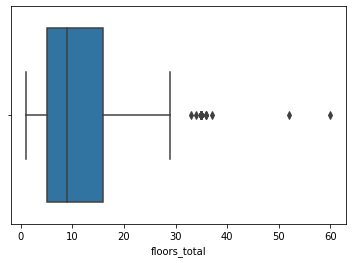

In [87]:
sns.boxplot(data=good_data, x='floors_total');

In [88]:
good_data['floors_total'].describe()

count    23370.000000
mean        10.712067
std          6.611168
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Оставим для анализ строки, в которых количество этажей не превышает 30.

In [89]:
good_data = good_data.query('floors_total <= 30')

**Проверим столбец `living_area` на предмет редких и выбивающихся значений**

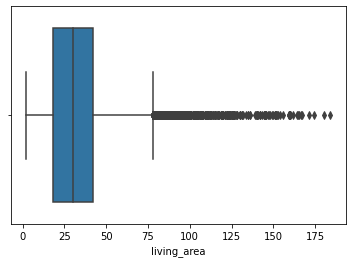

In [90]:
sns.boxplot(data=good_data, x='living_area');

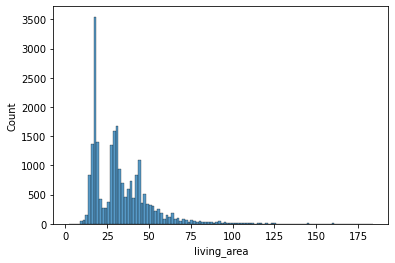

In [91]:
sns.histplot(good_data['living_area']);

In [92]:
good_data['living_area'].describe()

count    23338.000000
mean        33.287125
std         17.847570
min          2.000000
25%         18.300000
50%         30.100000
75%         42.100000
max        184.000000
Name: living_area, dtype: float64

Квартиры с жилой площадью более 100 квадратных метров встречаются редко, исключим их из анализа.

Также есть очень малые значения жилой площади.
Проверим сколько объектов имеют жилую площадь менее 10 метров.

In [93]:
#подсчитаем количество квартир с жилой площадью менее 10 квадратных метров
good_data[good_data['living_area'] < 10]['living_area'].count()

24

Оставим для анализ объекты с жилой площадью от 10 до 100 метров.

In [94]:
#Оставим для анализ объекты с жилой площадью от 10 до 100 метров.
good_data = good_data.query('10 <= living_area <= 100')

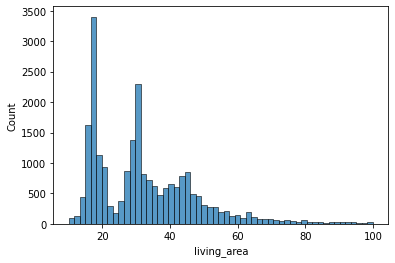

In [95]:
#ещё раз посмотрим на распределение после удаления выбивающихся значений
sns.histplot(good_data['living_area']);

Видно, что есть два всплеска по частоте жилой площади в районе 18 и 30 метров.

Посмотрим по конкретным значениям, какие встречаются чаще.

In [96]:
good_data['living_area'].value_counts()

18.000000    890
17.600000    742
30.500000    698
17.000000    674
30.000000    598
            ... 
33.470000      1
20.970000      1
17.450000      1
27.380001      1
16.740000      1
Name: living_area, Length: 1521, dtype: int64

**Проверим столбец `floor` на предмет редких и выбивающихся значений**

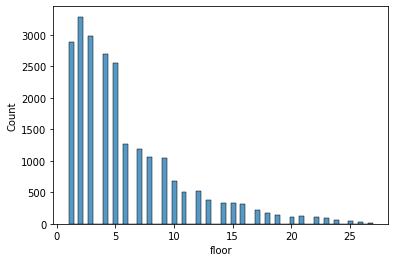

In [97]:
sns.histplot(good_data['floor']);

In [98]:
good_data['floor'].describe()

count    23101.000000
mean         5.880308
std          4.863612
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

В столбце floor не отмечено каких-то отклонений. 

**Проверим столбец `is_apartment` на предмет редких и выбивающихся значений**

In [99]:
good_data['is_apartment'].describe()

count     23101
unique        2
top       False
freq      23057
Name: is_apartment, dtype: object

In [100]:
good_data['is_apartment'].value_counts()

False    23057
True        44
Name: is_apartment, dtype: int64

Так как только 44 объекта отмечены признаком "апартаменты", и в дальнейшем не потребуется проводить анализ по данному признаку,
то можем удалить столбец `is_apartment`

In [101]:
#удаляем столбец is_apartment
good_data = good_data.drop('is_apartment', axis=1)

**Проверим столбец `studio` на предмет редких и выбивающихся значений**

In [102]:
good_data['studio'].describe()

count     23101
unique        2
top       False
freq      22901
Name: studio, dtype: object

In [103]:
good_data['studio'].value_counts()

False    22901
True       200
Name: studio, dtype: int64

**Проверим столбец `open_plan` на предмет редких и выбивающихся значений**

In [104]:
good_data['open_plan'].describe()

count     23101
unique        2
top       False
freq      23037
Name: open_plan, dtype: object

In [105]:
good_data['open_plan'].value_counts()

False    23037
True        64
Name: open_plan, dtype: int64

Так как только 64 объекта отмечены признаком "open_plan", и в дальнейшем не потребуется проводить анализ по данному признаку, то можем удалить столбец open_plan из датасета.

In [106]:
#удаляем столбец open_plan
good_data = good_data.drop('open_plan', axis=1)

**Проверим столбец `kitchen_area` на предмет редких и выбивающихся значений**

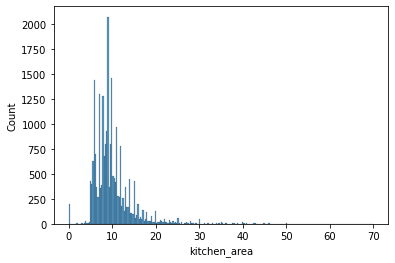

In [107]:
sns.histplot(good_data.kitchen_area);

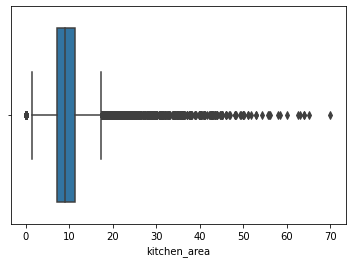

In [108]:
sns.boxplot(data=good_data, x='kitchen_area');

In [109]:
good_data['kitchen_area'].describe()

count    23101.000000
mean        10.082620
std          4.949654
min          0.000000
25%          7.100000
50%          9.040000
75%         11.200000
max         70.000000
Name: kitchen_area, dtype: float64

Удалим из набора данных объекты, с размером кухни более 30 метров.

In [110]:
#оставляем для анализа объекты, у которых площадь кухни не более 30 метров
good_data = good_data.query('kitchen_area <=30')

Квартиры с площадью кухни равной 0 - это студии, их оставляем.
А квартиры с менее 3 метров исключаем из анализа.

In [111]:
#удаляем квартиры с площадью менее 3 квадратных метров, кроме тех у которых площадь равняется 0
good_data = good_data.query('kitchen_area == 0 or kitchen_area > 3')

**Проверим столбец `balcony` на предмет редких и выбивающихся значений**

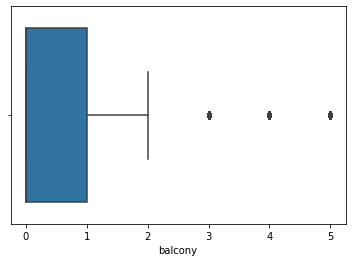

In [112]:
sns.boxplot(data=good_data, x='balcony');

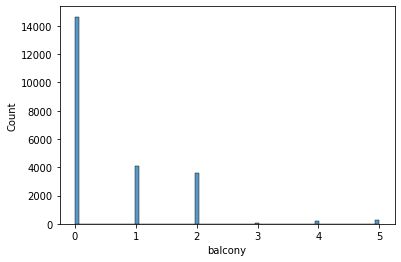

In [113]:
sns.histplot(good_data.balcony);

Количество балконов от 0 до 5.
Пока что ничего не делаем с ними не делаем.

**Проверим столбец `airports_nearest` на предмет редких и выбивающихся значений**

In [114]:
good_data['airports_nearest'].describe()

count    17348.000000
mean     28863.098398
std      12765.817475
min          0.000000
25%      18414.000000
50%      26905.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

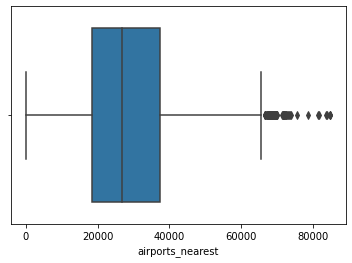

In [115]:
sns.boxplot(data=good_data, x='airports_nearest');

Посмотрим квартриры, у которых расстояние до аэропорта указано менее 5 км.

In [116]:
good_data.query('airports_nearest < 5000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_orig,living_area_orig
21085,0,7.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,...,Санкт-Петербург,0,22801,0,<NA>,0,<NA>,60,6.0,19.8


Всего для одной квартиры указано расстояние менее 5 км. от аэропорта, и это расстояние равно 0.

Оставим для рассмотрения квартиры, у которых расстояние от аэропорта находится в пределах от 5 до 80 километров.

In [117]:
good_data = good_data.query('5000 < airports_nearest < 80000')

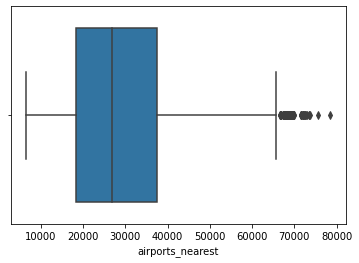

In [118]:
sns.boxplot(data=good_data, x='airports_nearest');

**Проверим столбец `cityCenters_nearest` на предмет редких и выбивающихся значений**

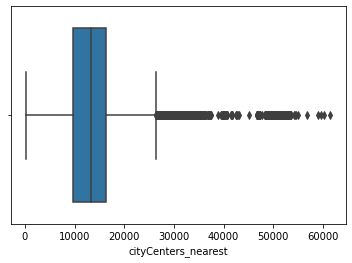

In [119]:
sns.boxplot(data=good_data, x='cityCenters_nearest');

In [120]:
good_data['cityCenters_nearest'].describe()

count    17339.000000
mean     14427.351347
std       8531.048583
min        208.000000
25%       9719.000000
50%      13242.000000
75%      16414.000000
max      61495.000000
Name: cityCenters_nearest, dtype: float64

In [121]:
good_data[good_data['cityCenters_nearest'] > 60000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_orig,living_area_orig
16569,13,3.2,52.8,2017-06-20,2,2.55,5,29.9,3,False,...,Ломоносов,53042,61495,2,223,0,<NA>,240,8.3,29.9
23123,0,1.8,32.0,2018-07-17,1,NaN,2,17.0,1,False,...,Ломоносов,56896,60223,1,17,0,<NA>,147,6.0,17.0


Есть выбивающиеся значения, достаточно сильно удаленные от города, и они сгруппированы на удалении около 40, 50 и 60 км.  Возможно пригороды расположены на таком расстоянии. Оставляем данные без изменений. 

**Проверим столбец `parks_around3000` на предмет редких и выбивающихся значений**

In [122]:
good_data.parks_around3000.describe()

count    17340.000000
mean         0.590600
std          0.784189
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

аномальные значение отсутствуют

**Проверим столбец `parks_nearest` на предмет редких и выбивающихся значений**

In [123]:
good_data.parks_nearest.describe()

count    7561.000000
mean      493.834281
std       341.996092
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

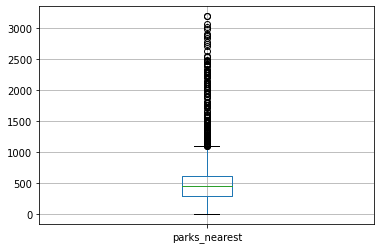

In [124]:
good_data.boxplot('parks_nearest')

Посмотрим 10 квартир с минимальным расстоянием до парка.

In [125]:
good_data.sort_values(by = 'parks_nearest').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,kitchen_area_orig,living_area_orig
14624,8,3.77000,45.40,2019-03-20,2,NaN,9,28.43,2,False,...,Санкт-Петербург,43932,16436,1,1,0,<NA>,42,6.9,28.43
11949,7,4.50000,44.00,2017-11-24,2,2.6,9,30.00,7,False,...,Санкт-Петербург,11806,12292,1,3,1,508,82,7.0,30.00
22941,8,10.96500,69.30,2019-01-10,1,3.0,4,48.90,4,False,...,Зеленогорск,73391,54490,3,4,1,217,110,NaN,48.90
9344,12,3.00000,28.10,2017-07-25,1,2.5,9,17.00,1,False,...,Санкт-Петербург,12051,11665,1,7,1,780,440,5.6,17.00
20193,3,11.80967,102.60,2017-04-21,3,NaN,9,45.00,3,False,...,Санкт-Петербург,27562,6410,2,9,2,480,90,17.8,NaN
2527,8,4.69000,60.30,2016-03-05,2,2.5,5,28.00,2,False,...,Кронштадт,69775,51500,3,9,3,345,146,7.9,28.00
15296,7,4.95000,53.00,2018-07-10,2,2.5,9,33.00,9,False,...,Санкт-Петербург,41954,12168,1,10,0,<NA>,62,6.8,33.00
4470,7,2.75000,30.90,2017-12-19,1,NaN,9,15.00,3,False,...,Санкт-Петербург,41954,12168,1,10,0,<NA>,45,8.0,15.00
214,5,4.15000,50.41,2017-07-20,2,2.5,9,31.10,8,False,...,Санкт-Петербург,41954,12168,1,10,0,<NA>,274,7.0,31.10
7788,14,5.55000,55.10,2017-06-25,2,2.7,7,33.60,3,False,...,Санкт-Петербург,43990,10661,2,10,1,786,88,7.1,33.60


Расстояние от ближайшего парка от 1 до 3190 метров. Оставляем все данные.

**Проверим столбец `ponds_around3000` на предмет редких и выбивающихся значений**

In [126]:
good_data.ponds_around3000.describe()

count    17340.000000
mean         0.744867
std          0.919547
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

В ближайших трёх километрах находятся от 0 до 3 парков. 

**Проверим столбец `ponds_nearest` на предмет редких и выбивающихся значений**

In [127]:
good_data.ponds_nearest.describe()

count    8538.000000
mean      525.287538
std       276.437905
min        13.000000
25%       306.000000
50%       510.000000
75%       734.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

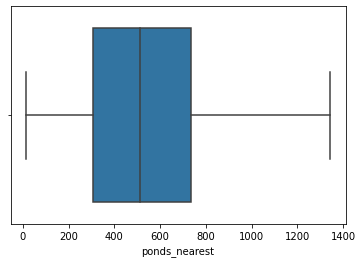

In [128]:
sns.boxplot(data=good_data, x='ponds_nearest');

Отсутствуют аномальные значения.

**Проверим столбец `days_exposition` на предмет редких и выбивающихся значений**

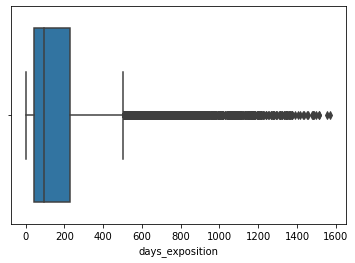

In [129]:
sns.boxplot(data=good_data, x='days_exposition');

In [130]:
good_data['days_exposition'].describe()

count    15217.000000
mean       178.549057
std        219.181550
min          1.000000
25%         42.000000
50%         94.000000
75%        227.000000
max       1572.000000
Name: days_exposition, dtype: float64

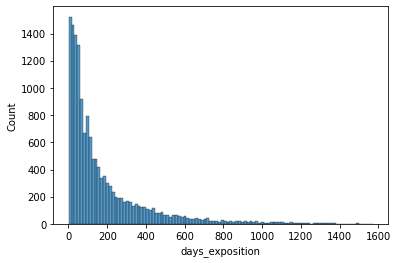

In [131]:
sns.histplot(good_data.days_exposition);

В основном большинство продаж не превышает 500 дней, и совсем небольшое количество квартир находится в продаже более 800 дней.
Исключим из анализа квартиры, срок продажи которых превышает 800 дней.

In [132]:
good_data = good_data.query('days_exposition <= 800')

#### Выводы по проверке на предмет редких и выбивающихся значений

- в столце `ceiling_height` для значений в диапазоне от 20 до 35 метров предположили ошибку ввода или искажения размерности и  заменили на значения в 10 раз меньше. Также для этого столбца удалили значения свыше 7 метров.
- в колонке `last_price` обнаружили квартиры, цена которых на два порядка превышает средние цены. Оставили для дальнейшего анализа объекты ценой до 40 млн. рублей. Для удобства заменили единицу измерения с рублей на миллионы рублей.
- по столбцу `total_area` исключили из анализа редко встречающиеся квартиры общей площадью более 250 м$^2$, а по жилой площади `living_area`- более 100 м$^2$ предположив, что возможно их следует относить к сегменту премиального класса и анализировать отдельно. 
- также исключили из дальнейшего анализа квартиры с жилой площадью `living_area` менее 10 м$^2$.
- оставили для анализа квартиры с количеством комнат `rooms` не более 7 и количеством этажей `floors_total` не более 30.
- в столбце `kitchen_area` посчитали редкими значения более 30 м$^2$ и редкими либо неправдободобными значения более 0 и менее 3м$^2$, и убрали их из датасета. Значение площади кухни равное 0 считаем нормальным для студий. 
- По количеству дней публикации `days_exposition` ограничили анализ теми, которые не превышают 800 дней. 
- По удаленности от центра города `cityCenters_nearest` есть выбивающиеся значения, которые сгруппированы около 40, 50 и 60 км.  Возможно пригороды расположены на таком расстоянии. Оставили данные для дальнейшего анализа.

## Добавьте в таблицу новые столбцы со следующими параметрами:

### Добавим в таблицу новые столбцы со следующими параметрами:


- `price_per_square_meter` - цена одного квадратного метра;
- `day_of_week` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month` - месяц публикации объявления;
- `year` - год публикации объявления;
- `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `city_center_km` - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [133]:
# цену квадратного метра рассчитываем от общей площади
# цену квадратного метра укажем в тысячах рублей (поэтому умножаем на 1000. так как общая цена сейчас измеряется в миллионах рублей)
good_data['price_per_square_meter'] = (good_data['last_price'] / good_data['total_area'] * 1000).round().astype('Int64')

In [134]:
# добавляем информацию о дне недели публикации - day_of_week
good_data['day_of_week'] = good_data['first_day_exposition'].dt.weekday

In [135]:
# добавляем информацию о месяце публикации - month
good_data['month'] = good_data['first_day_exposition'].dt.month

In [136]:
# добавляем информацию о годе публикации - year
good_data['year'] = good_data['first_day_exposition'].dt.year

In [137]:
#создаем функцию для определения категорий этажа
def categorize_floor(data):
    try:
        floor = data['floor']
        total_floor = data['floors_total']
        if floor == 1:
            return 'первый'
        elif floor == total_floor:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [138]:
#добавляем тип этажа
good_data['floor_type'] = good_data[['floor', 'floors_total']].apply(categorize_floor, axis=1)

In [139]:
#добавляем расстояние до центра в километрах
good_data['city_center_km'] = (good_data['cityCenters_nearest'] / 1000).astype('float').round().astype('Int64')

## Проведите исследовательский анализ данных

Выведем гистограммы по всем числовым столцам

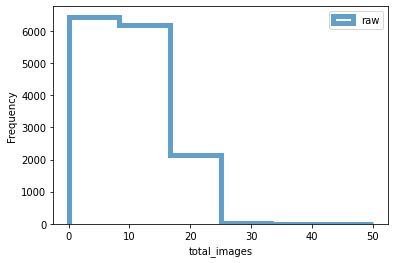

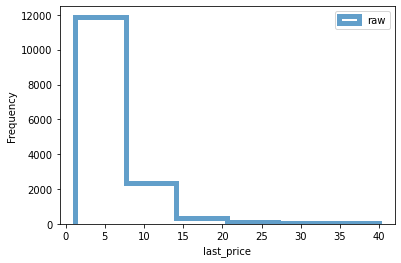

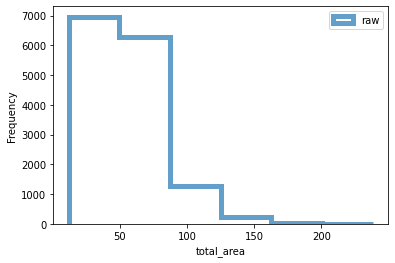

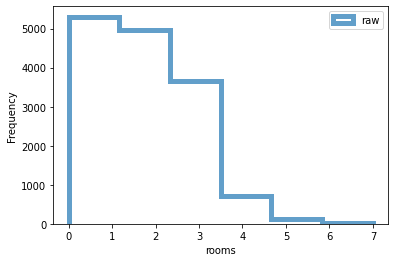

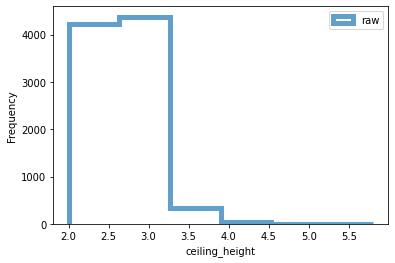

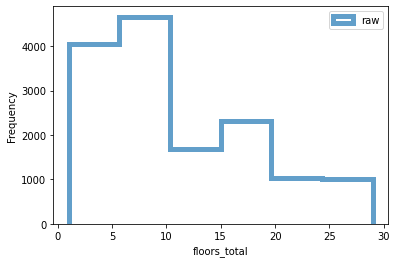

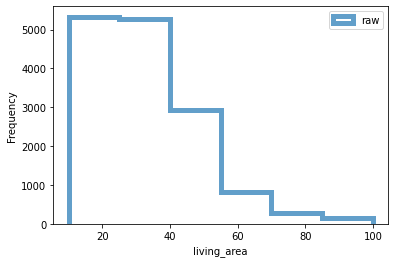

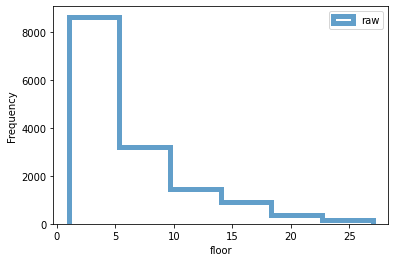

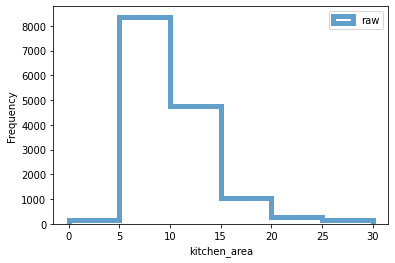

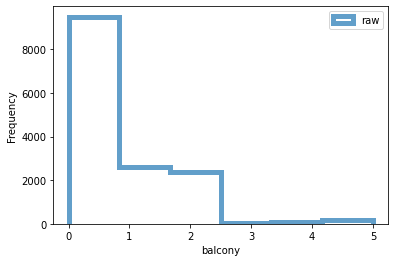

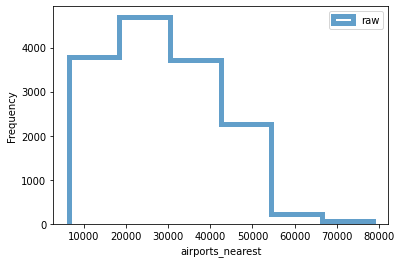

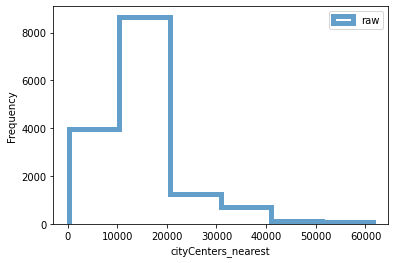

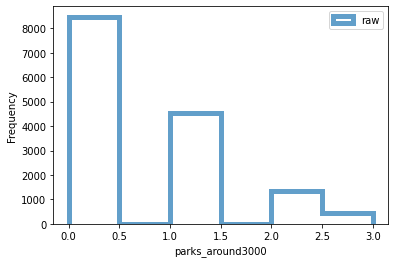

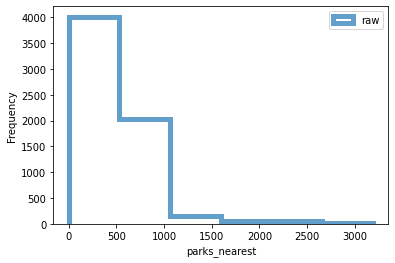

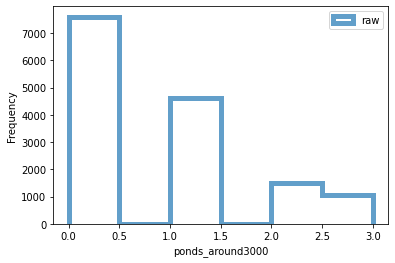

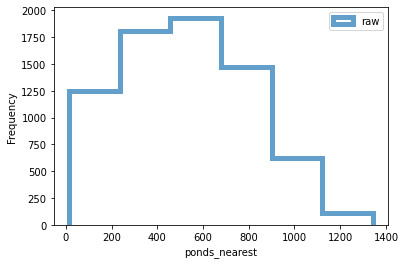

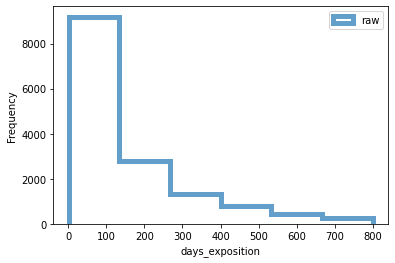

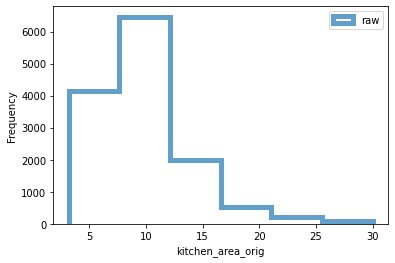

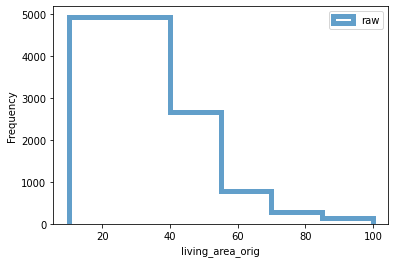

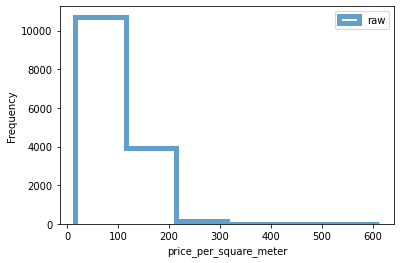

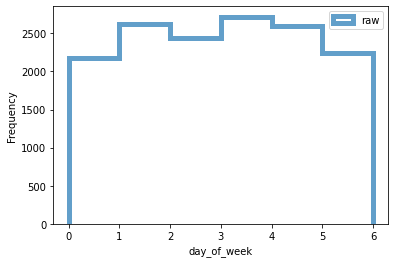

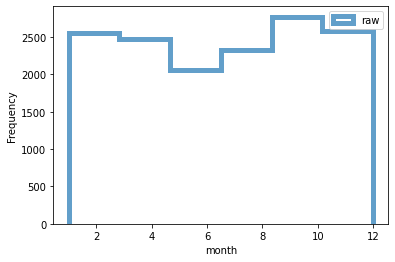

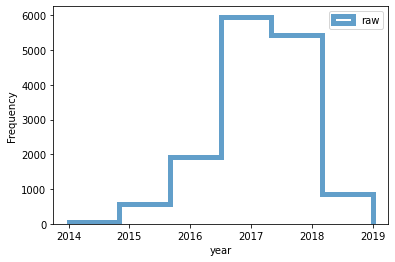

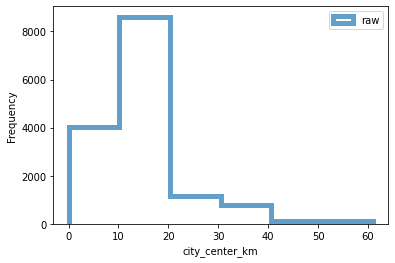

In [140]:
for column in good_data.select_dtypes(include=np.number).columns:
    #good_data[column].hist()
    #plt.show()
    
    (good_data[column]
                .plot(
                    kind='hist',
                    bins=6,
                    histtype='step',
                    linewidth=5,
                    alpha=0.7,
                    label='raw',
                    legend=True,
                    figsize=(6,4))
    ) 
    plt.xlabel(column)
    plt.show()

### Изучите следующие параметры объектов

#### Общая площадь

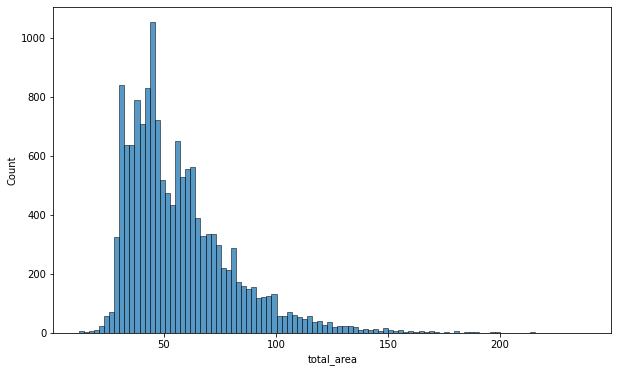

In [141]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(good_data.total_area);

Есть несколько пиков по частотности общей площади, посмотрим внимательнее диапазон от 20 до 80 м$^2$, в которых встречаются эти пики.

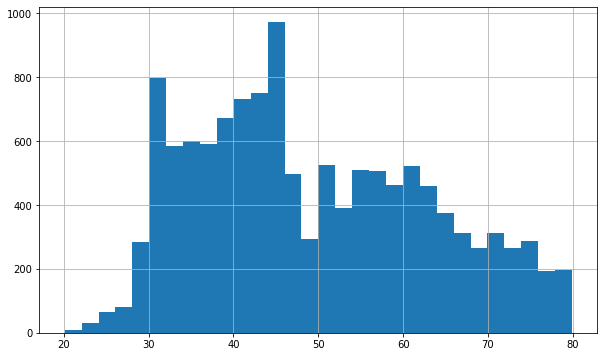

In [142]:
fig, ax = plt.subplots(figsize=(10,6))
good_data.query('20 < total_area < 80')['total_area'].hist(bins=30);

In [143]:
#выведем 5 самых популярных значений общей площади
good_data.query('20 < total_area < 80')['total_area'].value_counts().head(5)

45.0    307
42.0    246
31.0    239
60.0    232
44.0    225
Name: total_area, dtype: int64

Посмотрим в разрезе количества комнат медианную общая площадь и количество квартир.

In [144]:
#посмотрим сводную таблицу с медианными значениями общей площади в зависимости от количества комнат
good_data.pivot_table(index='rooms', values='total_area', aggfunc=['median', 'count'])

,median,count
,total_area,total_area
rooms,,
0,27.10,109
1,37.00,5196
2,53.30,4973
3,72.45,3656
4,95.30,705
5,125.10,133
6,120.00,9
7,134.00,3


Построим графики

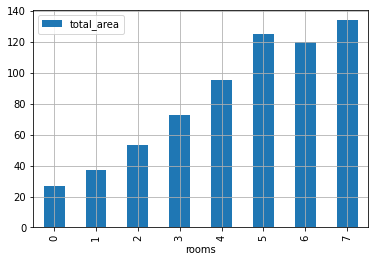

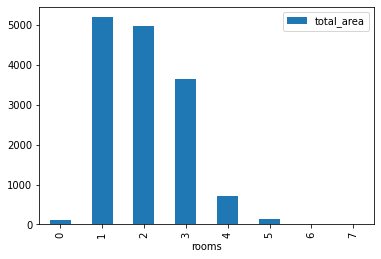

In [145]:
(good_data
     .pivot_table(index='rooms', values='total_area', aggfunc='median')
     .plot(kind='bar', grid=True))
plt.show()
(good_data
     .pivot_table(index='rooms', values='total_area', aggfunc='count')
     .plot(kind='bar'))
plt.show()

Всплески частотности по количеству квартир с общей площадью в районе 30 и 45 квадратных метров видимо связаны с тем, что больше всего в продаже одно- и двухкомнатных квартир, а у них наиболее популярна именно такая площадь.

Это подтверждается графиком ниже, где видно, что для однокомнатных квартир чаще всего встречается площадь от 30 до 40 квадратных метров, а для двухкомнатных в районе 45 квадратных метров.

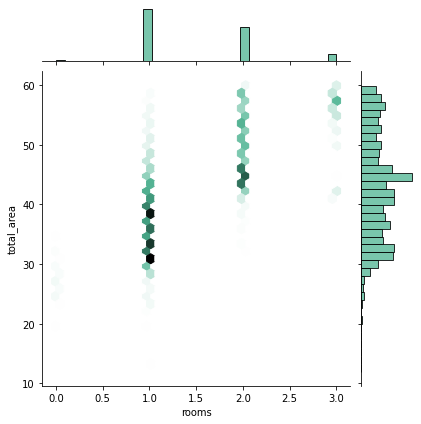

In [146]:
sns.jointplot(x='rooms', y='total_area', data=good_data.query('total_area < 60 and rooms < 4' ), kind="hex", color="#4CB391",
              height=6);

#### Жилая площадь

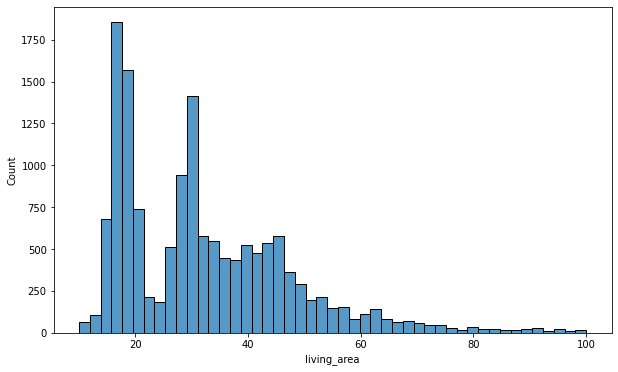

In [147]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(good_data.living_area);

Также как и для общей площади, для жилой площади есть несколько пиков популярности, и видимо это также связано с наибольшим количеством квартир с 1 и 2 комнатами, и их наиболее частым размером.

In [148]:
#посмотрим сводную таблицу с медианными значениями жилой площади в зависимости от количества комнат
good_data.pivot_table(index='rooms', values='living_area', aggfunc=['median', 'count'])

,median,count
,living_area,living_area
rooms,,
0,18.7,109
1,17.6,5196
2,30.5,4973
3,45.0,3656
4,63.4,705
5,85.0,133
6,84.5,9
7,84.0,3


У однокомнатных квартир медианный размер жилой площади меньше, чем у студий.
Это наверно нормально, так как в студиях не выделяется отдельно размер кухни и весь объем студии указывается как жилой.

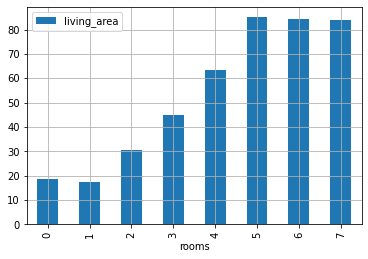

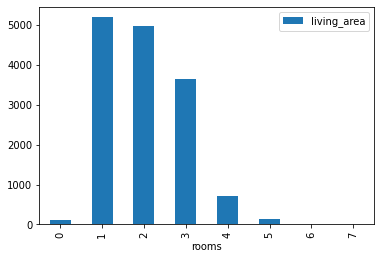

In [149]:
(good_data
     .pivot_table(index='rooms', values='living_area', aggfunc='median')
     .plot(kind='bar', grid=True))
plt.show()
(good_data
     .pivot_table(index='rooms', values='living_area', aggfunc='count')
     .plot(kind='bar'))

plt.show()

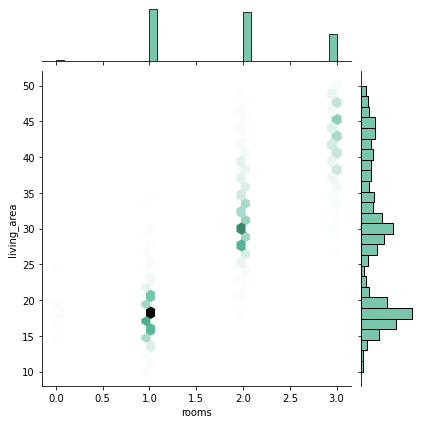

In [150]:
sns.jointplot(x='rooms', y='living_area', data=good_data.query('rooms < 4 and living_area < 50' ), kind="hex", color="#4CB391",
              height=6);

Чаще всего встречаются однокомнатные квартиры с жилой площадью около 17 м$^2$ и двухкомнатные с жилой площадью 30 м$^2$.

#### Площадь кухни

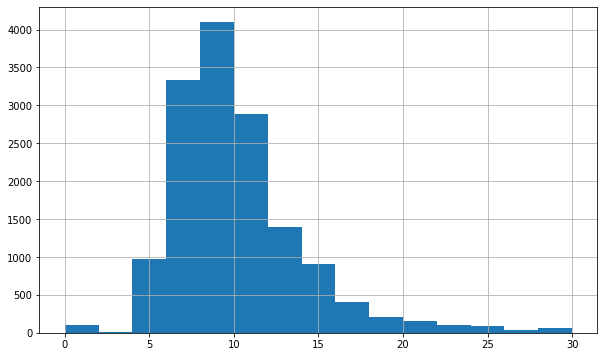

In [151]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['kitchen_area'].hist(bins=15);

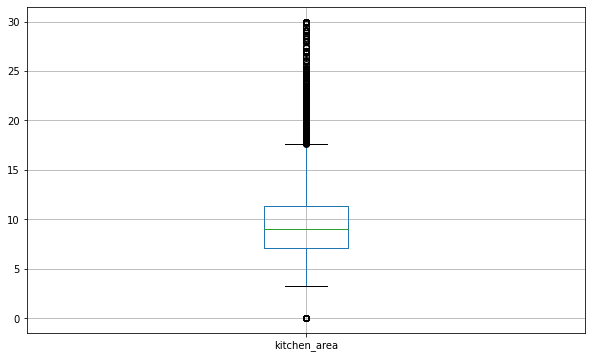

In [152]:
fig, ax = plt.subplots(figsize=(10,6))
good_data.boxplot('kitchen_area');

In [153]:
good_data.kitchen_area.describe()

count    14784.000000
mean         9.903990
std          3.952109
min          0.000000
25%          7.100000
50%          9.040000
75%         11.300000
max         30.000000
Name: kitchen_area, dtype: float64

У студий отдельная кухня отсутствует, поэтому для них размер кухни нулевой.

Средний и медианный размер кухни близки и составляют около 9 м$^2$. Вообще разброс размера площади кухни небольшой, межквартильный размах составляет менее 4 и примерно такое же стандартное отклонение.

#### Цена объекта

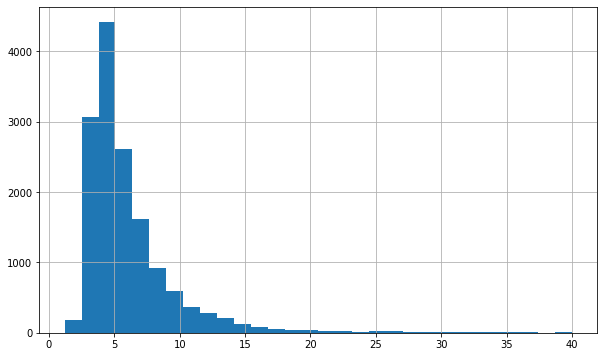

In [154]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['last_price'].hist(bins=30);

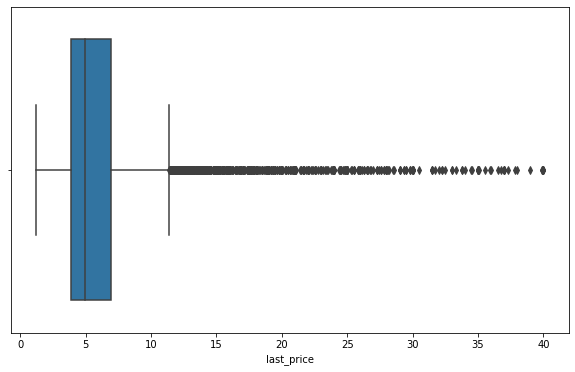

In [155]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=good_data, x='last_price');

In [156]:
good_data['last_price'].describe()

count    14784.000000
mean         6.083514
std          3.790453
min          1.200000
25%          3.900000
50%          4.980000
75%          6.900000
max         40.000000
Name: last_price, dtype: float64

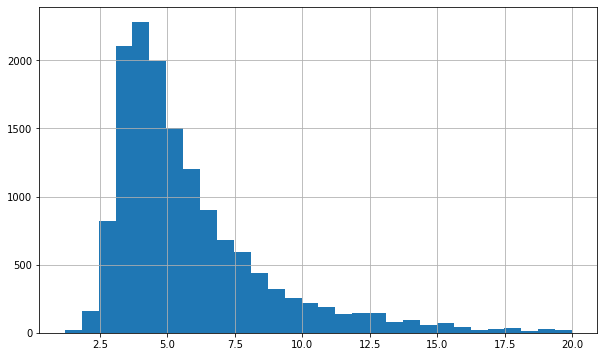

In [157]:
fig, ax = plt.subplots(figsize=(10,6))
good_data[good_data['last_price'] <20]['last_price'].hist(bins=30);

Большинство объектов укладываются в диапазон цен от 3,9 до 6,9 млн. рублей

#### Количество комнат

In [158]:
good_data['rooms'].value_counts()

1    5196
2    4973
3    3656
4     705
5     133
0     109
6       9
7       3
Name: rooms, dtype: int64

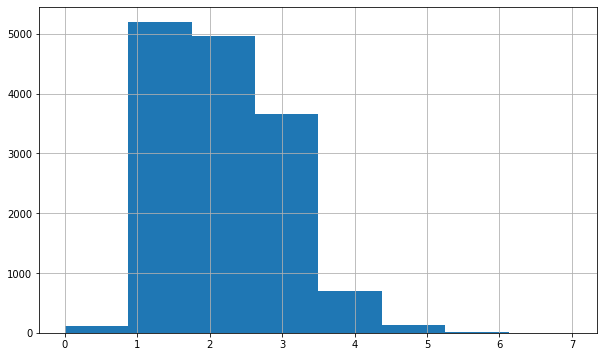

In [159]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['rooms'].hist(bins=8);

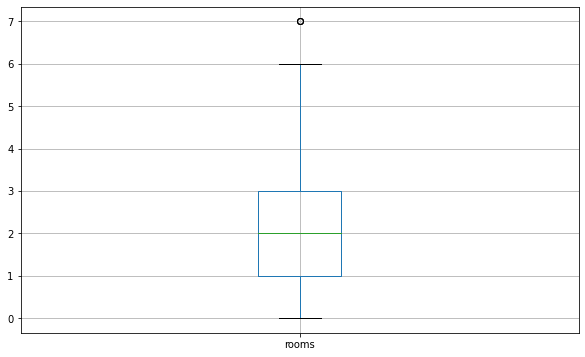

In [160]:
fig, ax = plt.subplots(figsize=(10,6))
good_data.boxplot('rooms');

Подавляющее большинство объектов имеют от 1 до 3 комнат.  Есть небольшое количество студий, у которых количество комнат отмечено как 0, небольшое количество 4-х и 5-и комнатных квартир, и единичные объекты с количеством комнат более 5.

#### Высота потолков

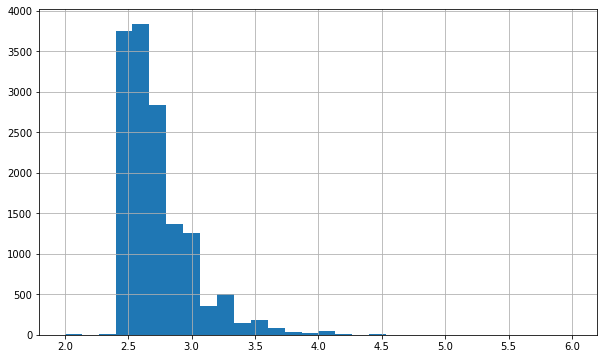

In [161]:
fig, ax = plt.subplots(figsize=(10,6))
data['ceiling_height'].hist(bins=30);

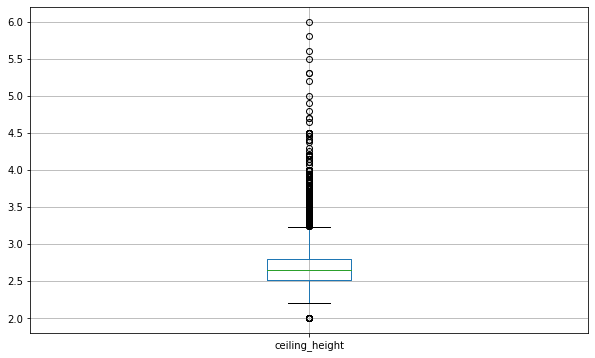

In [162]:
fig, ax = plt.subplots(figsize=(10,6))
data.boxplot('ceiling_height');

In [163]:
good_data['floor'] = good_data['floor'].astype('Int64')

In [164]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14784 entries, 1 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            14784 non-null  int64         
 1   last_price              14784 non-null  float64       
 2   total_area              14784 non-null  float64       
 3   first_day_exposition    14784 non-null  datetime64[ns]
 4   rooms                   14784 non-null  int64         
 5   ceiling_height          8982 non-null   float64       
 6   floors_total            14784 non-null  Int64         
 7   living_area             14784 non-null  float64       
 8   floor                   14784 non-null  Int64         
 9   studio                  14784 non-null  bool          
 10  kitchen_area            14784 non-null  float64       
 11  balcony                 14784 non-null  int32         
 12  locality_name           14746 non-null  object

In [165]:
good_data[(good_data['ceiling_height'] > 3.5)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_nearest,days_exposition,kitchen_area_orig,living_area_orig,price_per_square_meter,day_of_week,month,year,floor_type,city_center_km
154,1,8.2000,80.00,2018-11-06,3,4.15,3,44.20,2,False,...,838,38,12.20,44.20,102,1,11,2018,другой,3
368,19,12.5000,85.00,2018-09-21,3,3.70,6,56.50,6,False,...,36,4,22.00,56.50,147,4,9,2018,последний,6
797,1,7.5008,105.20,2017-09-08,3,3.80,5,62.60,2,False,...,<NA>,79,19.20,62.60,71,4,9,2017,другой,5
836,20,13.5000,78.70,2016-04-13,3,3.55,6,59.60,3,False,...,62,143,8.00,59.60,172,2,4,2016,другой,2
1003,8,9.0000,85.00,2017-08-07,3,3.80,5,52.00,4,False,...,1036,219,6.00,52.00,106,0,8,2017,другой,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22914,8,6.8000,69.60,2018-03-26,4,3.59,4,37.80,2,False,...,<NA>,211,7.80,37.80,98,0,3,2018,другой,4
22954,4,6.1000,83.00,2016-03-14,3,3.70,5,56.00,2,False,...,134,141,11.00,56.00,73,0,3,2016,другой,5
23014,8,2.2500,28.30,2017-08-04,1,3.70,3,10.90,2,False,...,110,424,7.30,10.90,80,4,8,2017,другой,53
23382,2,15.0000,150.90,2016-07-04,4,3.67,4,98.20,3,False,...,614,455,23.90,98.20,99,0,7,2016,другой,2


In [166]:
good_data[(good_data['ceiling_height'] > 3.5) & ((good_data['floor']) == (good_data['floors_total']))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,ponds_nearest,days_exposition,kitchen_area_orig,living_area_orig,price_per_square_meter,day_of_week,month,year,floor_type,city_center_km
368,19,12.500,85.00,2018-09-21,3,3.70,6,56.50,6,False,...,36,4,22.00,56.50,147,4,9,2018,последний,6
1186,8,7.800,72.00,2019-02-07,3,3.80,4,49.20,4,False,...,132,49,8.87,49.20,108,3,2,2019,последний,2
4201,9,8.250,84.20,2017-11-29,2,4.37,3,52.00,3,False,...,<NA>,17,15.00,52.00,98,2,11,2017,последний,5
4917,12,7.500,72.50,2017-11-10,1,3.95,4,33.70,4,False,...,868,5,14.80,33.70,103,4,11,2017,последний,4
6628,0,14.990,81.40,2017-10-23,2,3.70,5,46.90,5,False,...,<NA>,295,15.10,46.90,184,0,10,2017,последний,4
6802,15,7.500,69.00,2017-02-15,2,4.50,3,64.00,3,False,...,852,427,25.00,64.00,109,2,2,2017,последний,16
7477,4,13.660,131.30,2018-02-01,4,3.70,6,85.60,6,False,...,<NA>,115,13.70,85.60,104,3,2,2018,последний,4
9469,20,18.900,94.00,2017-11-29,3,3.70,6,57.00,6,False,...,<NA>,72,25.00,57.00,201,2,11,2017,последний,4
10159,14,11.500,85.60,2018-12-18,3,4.50,3,63.00,3,False,...,389,34,12.00,63.00,134,1,12,2018,последний,16
10558,18,7.800,76.30,2018-10-04,3,3.60,6,53.90,6,False,...,886,189,9.30,53.90,102,3,10,2018,последний,3


Посмотрим,на каком этаже находятся квартиры с высокими потолками

In [167]:
good_data[(good_data['ceiling_height'] > 3.5)].groupby('floor_type')['floor_type'].count()

floor_type
другой       93
первый       17
последний    27
Name: floor_type, dtype: int64

In [168]:
good_data[(good_data['ceiling_height'] < 2.4)].groupby('floor_type')['floor_type'].count()

floor_type
другой    4
Name: floor_type, dtype: int64

#### Этаж квартиры

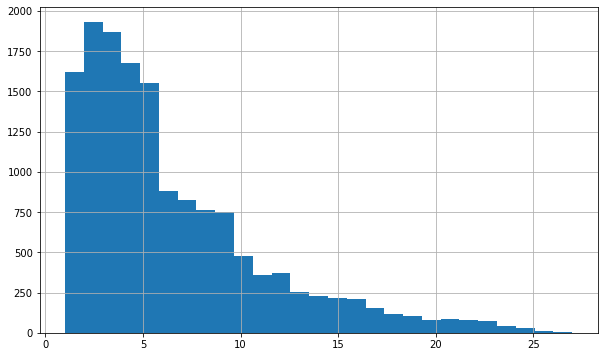

In [169]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['floor'].hist(bins=27);

In [170]:
good_data['floor'].value_counts()

2     1930
3     1868
4     1677
1     1621
5     1553
6      884
7      827
8      760
9      750
10     479
12     374
11     362
13     254
14     230
15     217
16     213
17     153
18     114
19     106
21      88
20      81
22      77
23      73
24      44
25      31
26      14
27       4
Name: floor, dtype: Int64

На гистограмме есть "ступеньки" после 5-го и 9-го этажей, что видимо связано с наиболее распространнеными домами с таким количеством этажей. Посмотрим на данных по общему количеству этажей в домах. 

#### Общее количество этажей в доме

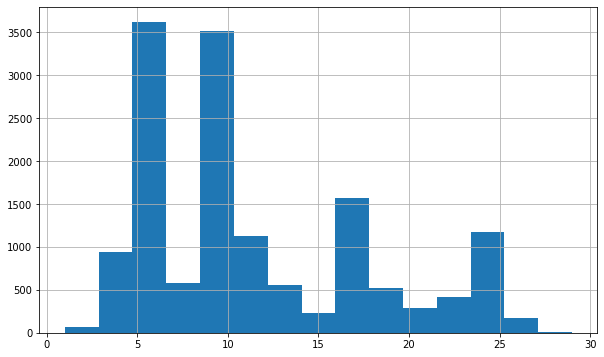

In [171]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['floors_total'].hist(bins=15);

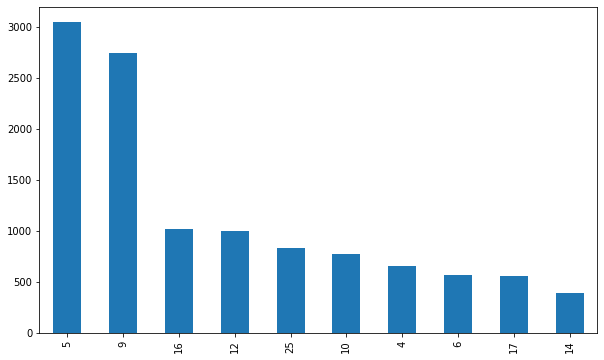

In [172]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['floors_total'].value_counts().head(10).plot(kind='bar');

Наиболее популярными являются пяти- и девятиэтажки.

#### Тип этажа квартиры

In [173]:
good_data['floor_type'].value_counts()

другой       11306
последний     1857
первый        1621
Name: floor_type, dtype: int64

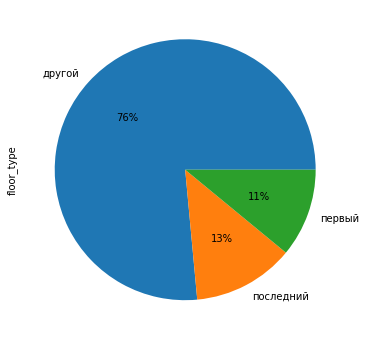

In [174]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['floor_type'].value_counts().plot(kind='pie', grid=True, autopct='%1.0f%%');

In [175]:
good_data['floor_type'].describe()

count      14784
unique         3
top       другой
freq       11306
Name: floor_type, dtype: object

В наборе данных примерно одинаковое количество квартир на первом и последнем этажах.

#### Расстояние до центра города в метрах

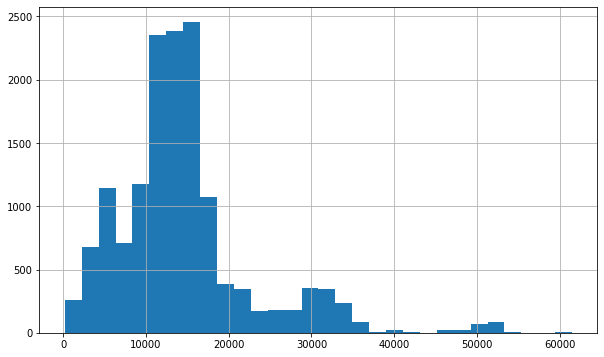

In [176]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['cityCenters_nearest'].hist(bins=30);

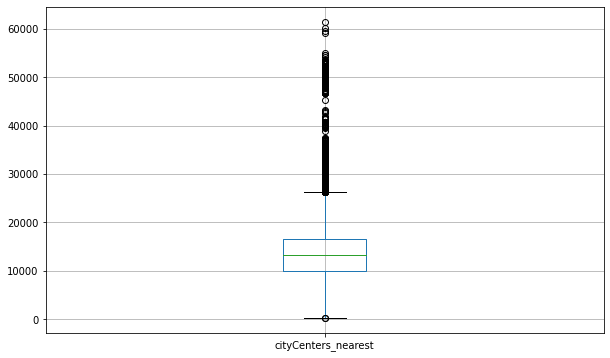

In [177]:
fig, ax = plt.subplots(figsize=(10,6))
good_data.boxplot('cityCenters_nearest');

In [178]:
good_data['cityCenters_nearest'].describe()

count    14784.000000
mean     14553.874121
std       8455.629021
min        208.000000
25%       9989.500000
50%      13313.000000
75%      16464.250000
max      61495.000000
Name: cityCenters_nearest, dtype: float64

Большинство квартир находится на расстоянии от 10 до 17 километров от центра города.
Также есть всплески по количеству квартир на удалении около 30 км. и около 50 км., что видимо связано с конкретными пригородами.

In [179]:
# построим табличку с медианным расстоянием от центра города в разрезе населенных пунктов и посчитаем количество квартир в каждом населенном пункте
df_city_centers = (good_data.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=['median', 'count'])
#    .sort_values(by=(['count']['cityCenters_nearest']))
)

In [180]:
#переименуем столбцы для удобства
columns = ['median_distance', 'count']
df_city_centers.columns = columns

In [181]:
df_city_centers.sort_values(by='count', ascending=False)

,median_distance,count
locality_name,,
Санкт-Петербург,12482.0,12623
Шушары,24211.0,395
Колпино,32000.0,302
Парголово,19301.5,296
Пушкин,27920.0,286
Петергоф,33058.0,167
Сестрорецк,34821.0,153
Красное Село,29148.5,152
Ломоносов,51751.0,108


Посмотрим на графике, на каком расстоянии от центра города находятся пригородные города, в которых более 100 квартир в продаже.

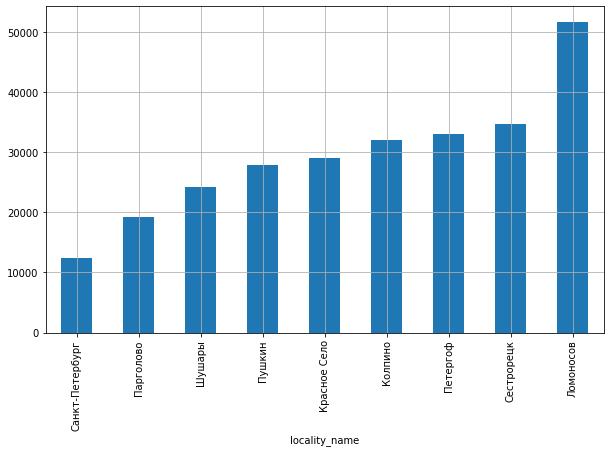

In [182]:
fig, ax = plt.subplots(figsize=(10,6))
df_city_centers.query('count > 100').sort_values(by='median_distance')['median_distance'].plot(kind='bar', grid=True);

Ближе всего из пригородов к центру города квартиры в Парголово, затем есть ряд районов с расстоянием около 30 км. и наиболее удаленным пунктом с количеством квартир более 100 является Ломоносов.

#### Расстояние до ближайшего аэропорта

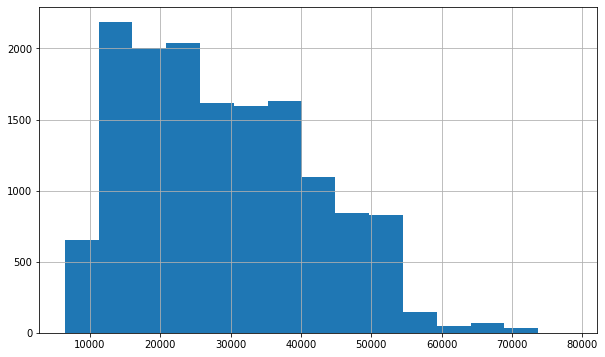

In [183]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['airports_nearest'].hist(bins=15);

In [184]:
good_data['airports_nearest'].describe()

count    14784.000000
mean     28918.638934
std      12833.402336
min       6450.000000
25%      18320.500000
50%      27028.000000
75%      37474.500000
max      78527.000000
Name: airports_nearest, dtype: float64

In [185]:
# построим табличку с медианным расстоянием от ближайшего аэропорта в разрезе населенных пунктов и посчитаем количество квартир в каждом населенном пункте
df_airport_distance = (good_data.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['median', 'count'])
#    .sort_values(by=(['count']['cityCenters_nearest']))
)

In [186]:
#переименуем столбцы для удобства
columns = ['median_distance', 'count']
df_airport_distance.columns = columns

In [187]:
df_airport_distance

,median_distance,count
locality_name,,
Александровская,12781.0,1
Белоостров,57769.0,1
Зеленогорск,72078.0,19
Колпино,26214.0,302
Красное Село,25723.5,152
Кронштадт,67844.0,83
Левашово,52693.0,1
Лисий Нос,54999.0,2
Ломоносов,48479.0,108


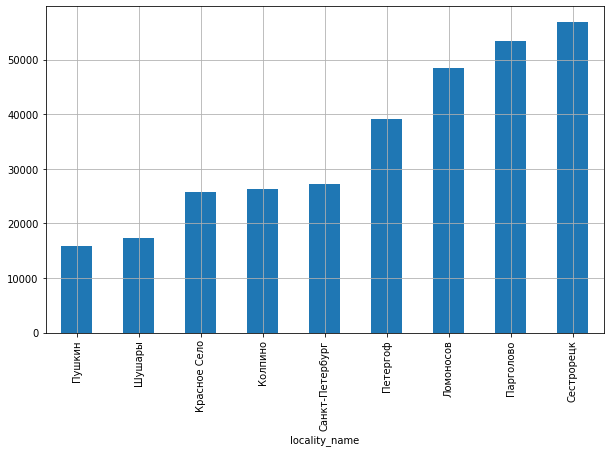

In [188]:
fig, ax = plt.subplots(figsize=(10,6))
df_airport_distance.query('count > 100').sort_values(by='median_distance')['median_distance'].plot(kind='bar', grid=True);

Ближе всего к аэропорту находятся квартиры в Пушкине, а дальше всего в Сестрорецке (по выборке районов, в которых более 100 квартир в продаже)

#### Расстояние до ближайшего парка

In [189]:
good_data['parks_nearest'].describe()

count    6317.000000
mean      490.682444
std       339.783440
min         1.000000
25%       287.000000
50%       455.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

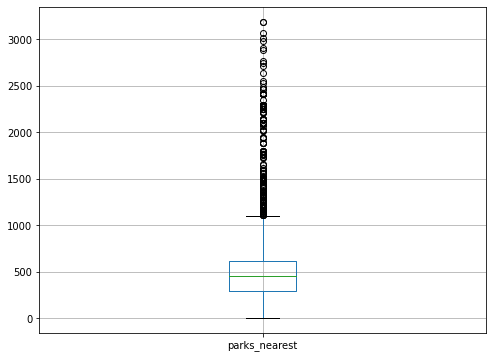

In [190]:
fig, ax = plt.subplots(figsize=(8,6))
good_data.boxplot('parks_nearest');

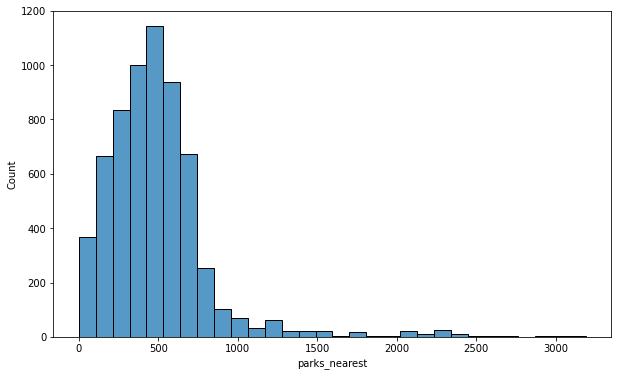

In [191]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(good_data['parks_nearest'], bins=30);

In [192]:
# построим табличку с медианным расстоянием от ближайшего парка в разрезе населенных пунктов и посчитаем количество квартир в каждом населенном пункте
df_park_distance = (good_data.pivot_table(index='locality_name', values='parks_nearest', aggfunc=['median', 'count'])
#    .sort_values(by=(['count']['cityCenters_nearest']))
)

In [193]:
df_park_distance

,median,count
,parks_nearest,parks_nearest
locality_name,,
Зеленогорск,148.0,15
Колпино,394.0,118
Красное Село,428.5,38
Кронштадт,286.0,77
Ломоносов,407.0,15
Павловск,301.0,20
Парголово,733.0,10
Петергоф,298.0,125


В половине населенных пунктов отсутствуют парки в радиусе 3 километров от жилья.

In [194]:
#переименуем столбцы для удобства
columns = ['median_distance', 'count']
df_park_distance.columns = columns

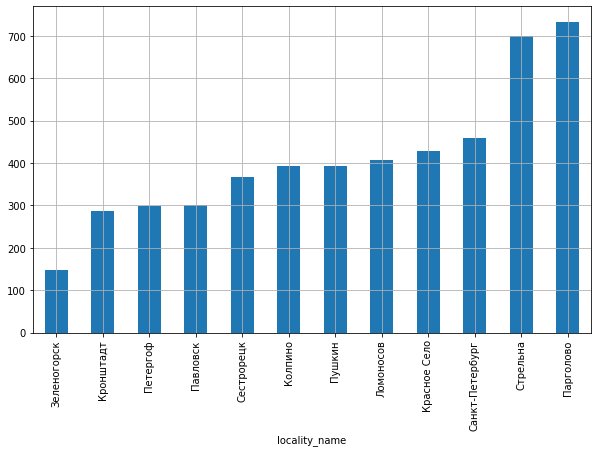

In [195]:
fig, ax = plt.subplots(figsize=(10,6))
df_park_distance.query('count > 0').sort_values(by='median_distance')['median_distance'].plot(kind='bar', grid=True);

Среди городов, где есть парки, в среднем ближе всего парк можно встретить в Зеленогорске, а дальше всего - в Стрельне и Парголово.

#### День и месяц публикации

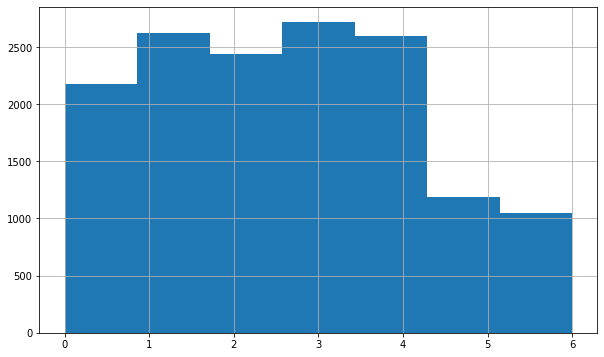

In [196]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['day_of_week'].hist(bins=7);

In [197]:
good_data['day_of_week'].value_counts()

3    2717
1    2622
4    2596
2    2435
0    2174
5    1189
6    1051
Name: day_of_week, dtype: int64

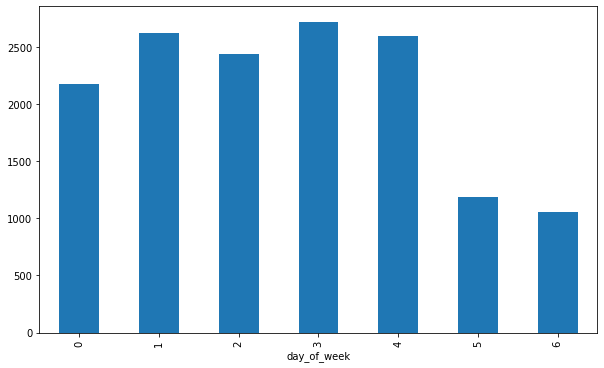

In [198]:
fig, ax = plt.subplots(figsize=(10,6))
good_data.groupby('day_of_week')['day_of_week'].count().plot(kind='bar');

Больше всего объявлений размещают в среду. В рабочие дни появляется более 2000 объявлений в день, а в выходные примерно в два раза меньше, около 1000 объявлений в день. 

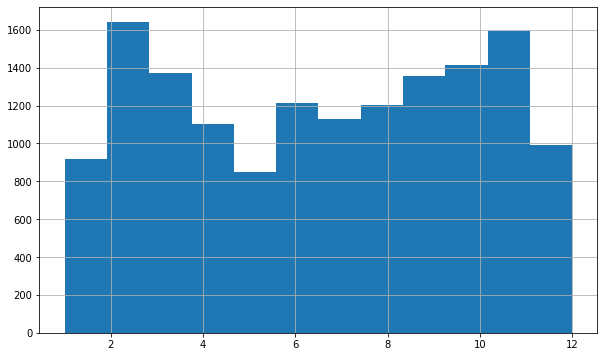

In [199]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['month'].hist(bins=12);

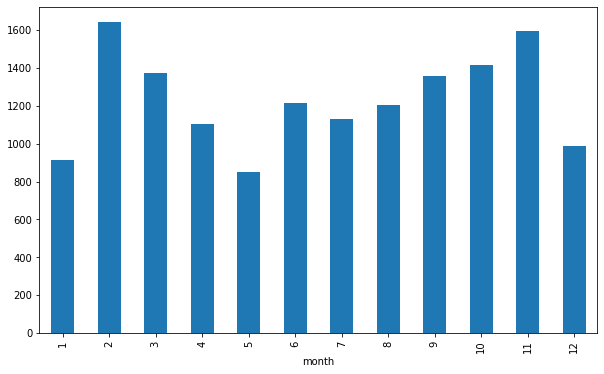

In [200]:
fig, ax = plt.subplots(figsize=(10,6))
good_data.groupby('month')['month'].count().plot(kind='bar');

Пики по количеству размещаемых объявлений приходятся на февраль и ноябрь.
С февраля по май количество объявлений уменьшается, и затем во второй половине года начинает расти с каждым месяцем вплоть до ноября.
Меньше всего объявлений появляется в январе, мае и декабре.

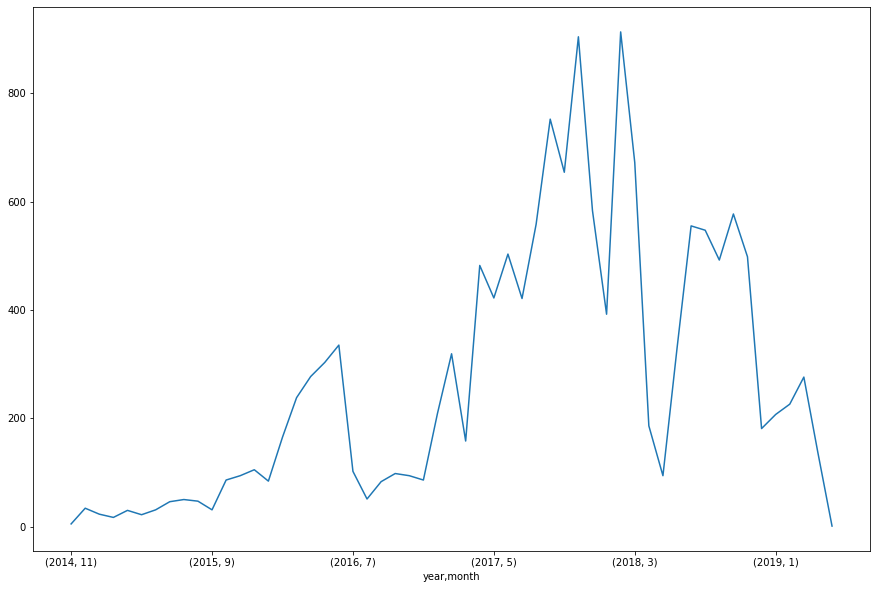

In [201]:
good_data.groupby(['year','month'])['last_price'].count().plot(kind='line', figsize=(15,10));

Больше всего объявлений в датасете приходится на 2017 год.

### Изучите, как быстро продавались квартиры

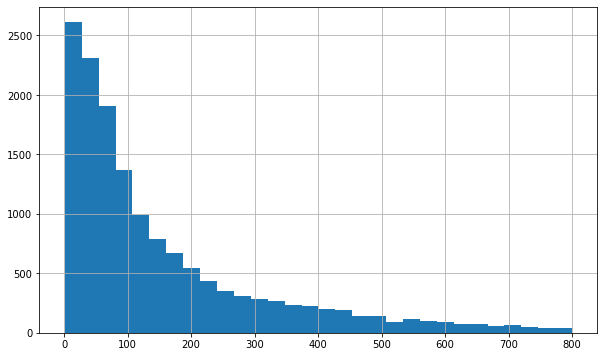

In [202]:
fig, ax = plt.subplots(figsize=(10,6))
good_data['days_exposition'].hist(bins=30);

In [203]:
good_data['days_exposition'].describe()

count    14784.000000
mean       153.675392
std        163.766915
min          1.000000
25%         41.000000
50%         90.000000
75%        209.000000
max        800.000000
Name: days_exposition, dtype: float64

В среднем квартира продается за 153 дня, а медианное значение - 90 дней.
Такая разница между средним и медианой вызвана наличием достаточно большого количества квартир, которые долго находятся в продаже.

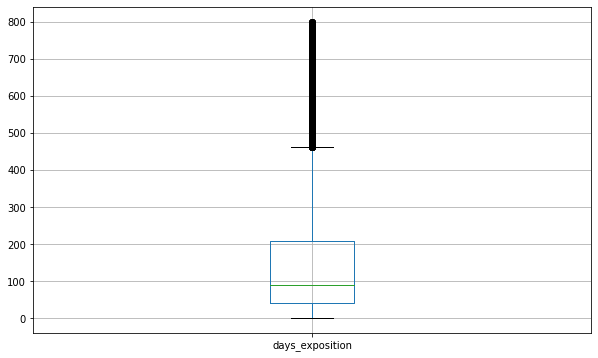

In [204]:
fig, ax = plt.subplots(figsize=(10,6))
good_data.boxplot('days_exposition');

Большинство квартир продается в диапазоне от 40 до 209 дней. 

In [205]:
#количество кваартир, продававшихся менее недели в разбивке по дням
good_data[good_data['days_exposition'] <= 7]['days_exposition'].value_counts()

7    180
4    138
3    125
5    120
6     97
2      3
1      1
Name: days_exposition, dtype: Int64

Есть единичные продажи за один-два дня, их можно назвать очень быстрыми.

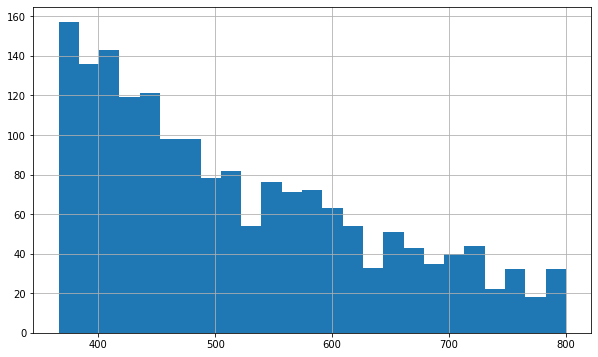

In [206]:
#построим гистограмму по квартирам, которые продавались более года
fig, ax = plt.subplots(figsize=(10,6))
good_data[good_data['days_exposition'] > 365]['days_exposition'].hist(bins=25);

Количество квартир, находящихся в продаже более года, плавно снижается со временем жизни объявления. Продажи более 500 дней видимо можно считать необычно долгими.

### Какие факторы больше всего влияют на полную стоимость квартиры

#### Зависит ли цена от общей площади

Построим диаграмму рассеяния для общей площади и полной стоимости квартиры

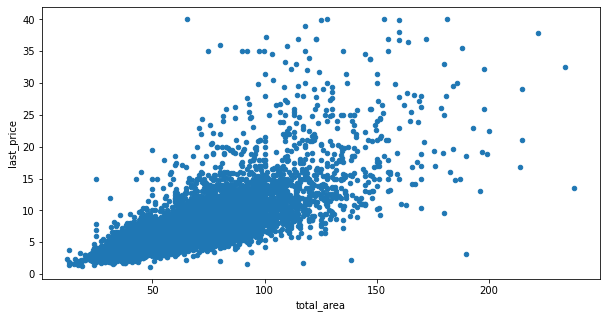

In [207]:
good_data.plot(x='total_area', y='last_price', kind='scatter', figsize=(10,5));

In [208]:
#посчитаем коэффициент корреляции
good_data['total_area'].corr(good_data['last_price'])

0.7841126349797436

Коэффициент корреляции близок к 1 и показывает, что есть положительная взаимосвязь: чем больше общая площадь, тем более высокая цена.

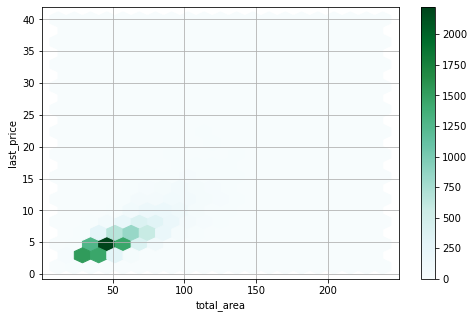

In [209]:
good_data.plot(x='total_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8,5), sharex=False, grid=True);

#### Зависит ли цена от жилой площади

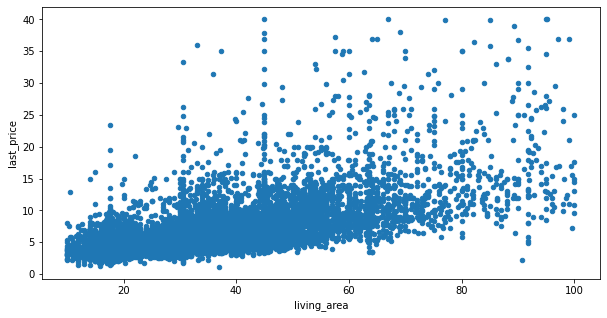

In [210]:
good_data.plot(x='living_area', y='last_price', kind='scatter', figsize=(10,5));

Здесь на диаграмме рассеяния для жилой площади прослеживается более пологая взаимосвязь по сравнению с общей площадью.

In [211]:
#посчитаем коэффициент корреляции
good_data['living_area'].corr(good_data['last_price'])

0.6569367975546615

и коэффициент корреляции поменьше, но положительная взаимосвязь есть, чем больше жилая площадь, тем больше цена. 

#### Зависит ли цена от площади кухни

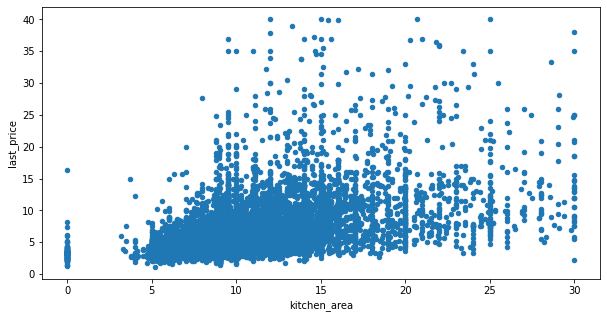

In [212]:
good_data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(10,5));

In [213]:
#посчитаем коэффициент корреляции
good_data['kitchen_area'].corr(good_data['last_price'])

0.535975997550217

Также есть положительная взаимосвязь между площадью кухни и общей стоимостью, но она менее выражена, чем для жилой и общей площади.

#### Зависит ли цена от количества комнат

Найдем медианную стоимость в разрезе количества комнат

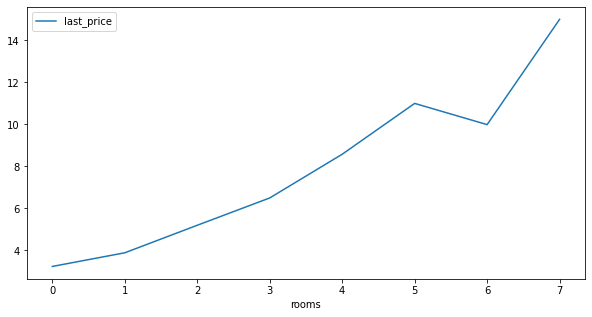

In [214]:
good_data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(kind='line', figsize=(10,5));

Видим пракитически линейную зависимость между количеством комнат и общей ценой. На графике есть небольшой провал по цене для шестикомнатных квартир, но так как количество таких квартир невелико, то это могло оказать влияние на график.

#### Зависит ли цена от категории этажа (первый, последний, другой)

Найдем медианную стоимость в разрезе категории этажа, отсортируем по возрастанию и построим график.

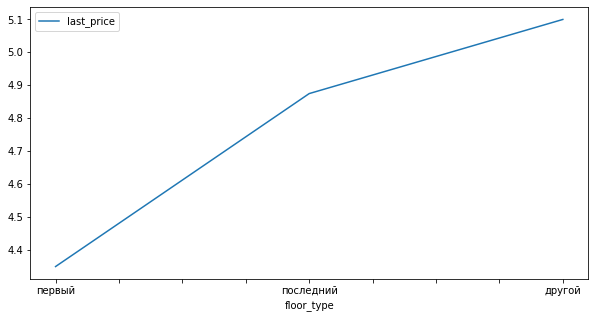

In [215]:
good_data.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values(by='last_price').plot(kind='line', figsize=(10,5));

Дешевле всего стоят квартиры на первом этаже. Следом по стоимости идёт последний этаж, который немного уступает всем остальным этажам.

#### Зависит ли цена от даты размещения объявления

##### Зависит ли цена от дня размещения объявления 

По данному графику видно, что практически нет разницы в цене в зависимости от дня размещения.

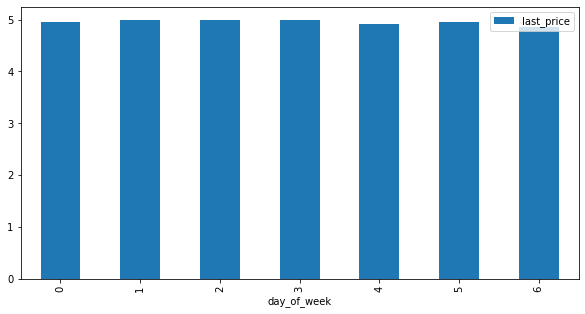

In [216]:
good_data.pivot_table(index='day_of_week', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(10,5));

Хотя, если посмотреть на такой график (см.ниже), то кажется, что к выходным цена падает. 
Но так как здесь значения по оси y отмечены не от нуля, то создается обманчивое впечатление резкого снижения цены для размещения по воскресеньям.

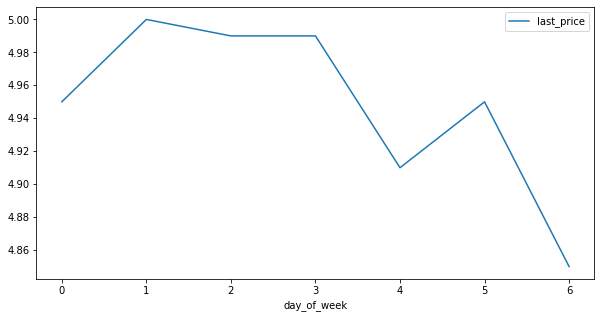

In [217]:
good_data.pivot_table(index='day_of_week', values='last_price', aggfunc='median').plot(kind='line', figsize=(10,5));

##### Зависит ли цена от месяца размещения объявления 

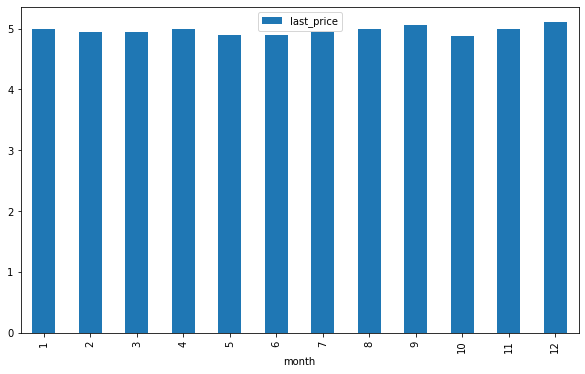

In [218]:
good_data.pivot_table(index='month', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(10,6));

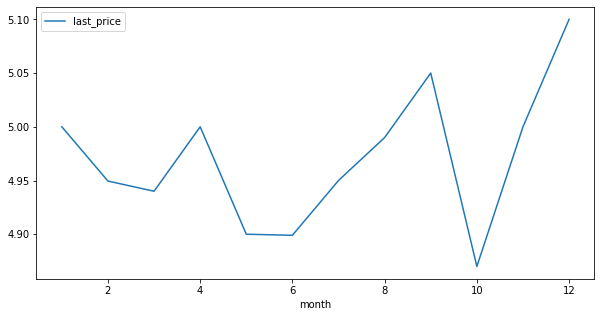

In [219]:
good_data.pivot_table(index='month', values='last_price', aggfunc='median').plot(kind='line', figsize=(10,5));

На столбчатом графике видно, что от месяца размещения цена также практически не меняется. Чуть более высокие цены выставляют в декабре.

##### Зависит ли цена от года размещения объявления 

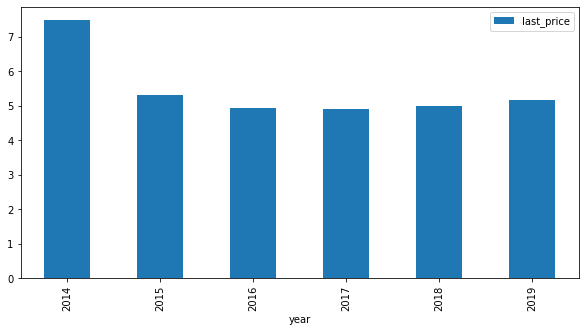

In [220]:
good_data.pivot_table(index='year', values='last_price', aggfunc='median').plot(y='last_price', kind='bar', figsize=(10,5));

График показывает, что самые высокие цены были в 2014 года, а затем упали и держались примерно на одном уровне.
Посмотрим корректно ли это с точки зрения количества наблюдений по годам.

In [221]:
good_data.groupby('year')['last_price'].count()

year
2014      39
2015     582
2016    1916
2017    5965
2018    5436
2019     846
Name: last_price, dtype: int64

За 2014-й год в нашем датасете на порядок меньше записей, чем за последующие годы. Возможно из-за этого медианная цена в этом году получилась выше.
Более корректно оценивать годы, за которые есть достаточно данных.
Посмотрим на период с 2016 по 2018.

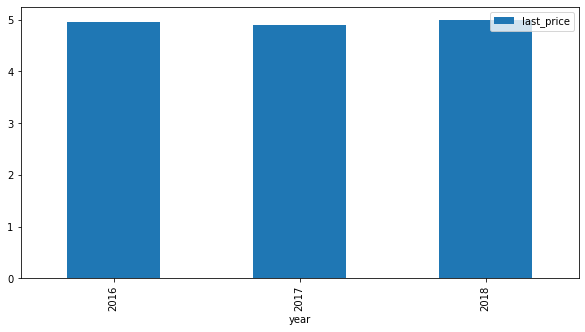

In [222]:
(good_data
    .query('year in (2016, 2017, 2018)')
    .pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(y='last_price', kind='bar', figsize=(10,5)));

За эти годы цена оставалась в диапазоне 4.9 - 5 млн. Зависимости цены объекта от года размещения объявления не наблюдается.

### Средняя цена в 10 населённых пунктах с наибольшим количеством объявлений

Добавляем столбец с ценой квадратного метра. Стоимость укажем в тысячах рублей за метр.

In [223]:
good_data['cost_per_square_meter'] = (good_data['last_price'] / good_data['total_area']) * 1000

In [224]:
#при помощи сводной таблицы сохраняем информацию о средней цене квадратного метра и количестве объявлений в каждом городе
towns_data = good_data.pivot_table(index='locality_name', values='cost_per_square_meter', aggfunc=['mean', 'count'])

In [225]:
#переименовываем колонки
columns=['cost_per_saqure_meter','count']
towns_data.columns = columns

In [226]:
# в popular_towns записываем информацию о 10 самых популярных городах 
popular_towns = towns_data.sort_values(by='count', ascending=False).head(10)

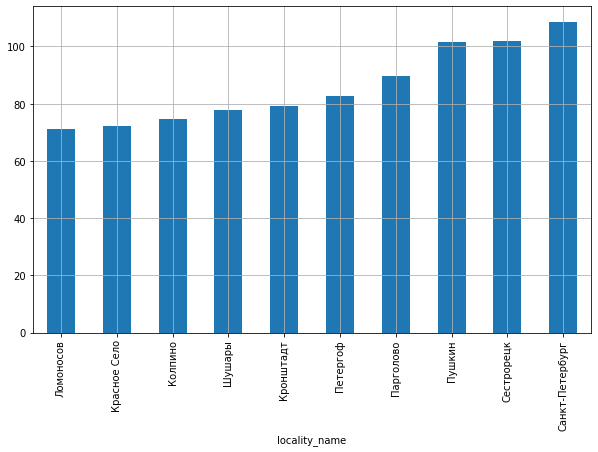

In [227]:
fig, ax = plt.subplots(figsize=(10,6))
popular_towns.sort_values(by='cost_per_saqure_meter')['cost_per_saqure_meter'].plot(kind='bar', grid=True);

In [228]:
#печатаем названия городов с минимальной и максимальной ценой за квадратный метр
print(f"Самая низкая цена {popular_towns['cost_per_saqure_meter'].min().round()} тысяч рублей за кв.метр в городе\
      {popular_towns[(popular_towns['cost_per_saqure_meter'] == popular_towns['cost_per_saqure_meter'].min())].index[0]}")

print(f"Самая высокая цена {popular_towns['cost_per_saqure_meter'].max().round()} тысяч рублей за кв.метр в городе\
      {popular_towns[(popular_towns['cost_per_saqure_meter'] == popular_towns['cost_per_saqure_meter'].max())].index[0]}")

Самая низкая цена 71.0 тысяч рублей за кв.метр в городе      Ломоносов
Самая высокая цена 109.0 тысяч рублей за кв.метр в городе      Санкт-Петербург


### Средняя цена "километра" при удалении от центра в Санкт-Петербурге

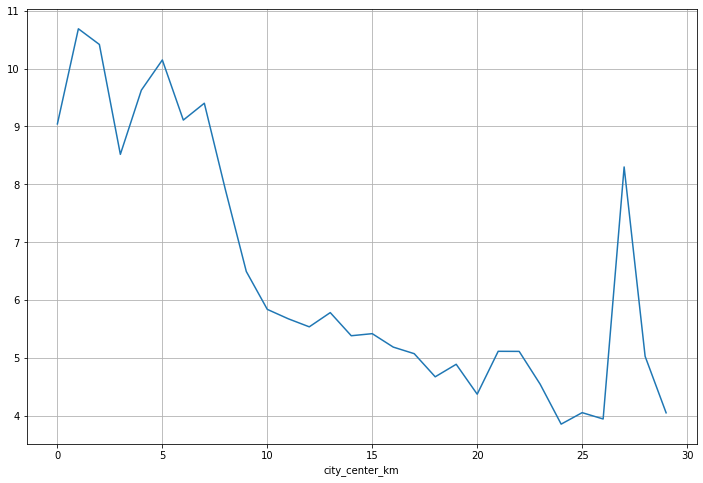

In [229]:
(good_data
    .query('locality_name=="Санкт-Петербург"')
    .groupby('city_center_km')['last_price'].mean()
    .plot(kind='line', figsize=(12,8), grid=True)
);

Наиболее высокая цена у квартир в радиусе 7 километров от центра города. Затем стоимость начинает резко снижаться.
Есть всплеск цены на 27 километре, посмотрим квартиры, относящиеся к этому километру.

In [230]:
good_data.query('locality_name=="Санкт-Петербург" & city_center_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,days_exposition,kitchen_area_orig,living_area_orig,price_per_square_meter,day_of_week,month,year,floor_type,city_center_km,cost_per_square_meter
748,13,14.35,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,128,25.0,30.0,194,1,11,2017,другой,27,193.918919
5961,6,2.25,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,178,7.0,16.5,70,1,2,2018,последний,27,70.312500


На данном километре в выборку попало только две квартиры, поэтому можно считать выбросом столь высокую цену на таком удалении от центра.
Соответственно вывод остаётся прежним, наиболее дорогие квартиры находятся в центре города.

### Общий вывод

В проекте были изучены данные о продажах квартир в Санкт-Петербурге и соседних населённых пунктах.

После первоначального знакомства с данными были определены пропущенные значения в столбцах.
В данных, введенных пользователями, были исправлены отсутствующие значения в следующих столбцах:
- для числа балконов проставлено нулевое значение.
- для числа парков и водоёмов проставлено нулевое значение
- признак апартаментов выставлен в значение False
- пропуски в столбцах `kitchen_area` и `living_area` заполнили, вычислив значения площади кухни и жилой площади с помощью умножения общей площади на медианное значение относительной площади кухни и жилой площади соответственно, в зависимости от количества комнат.

Пропуски в картографических данных были оставлены в исходном виде, без заполнения.

На этапе предобработки данных поменяли типы столбцов:
- для столбца 'first_day_exposition' установили тип datetime, чтобы иметь возможность совершать операции с датами,
- для столбцов значения которых по смыслу измеряются в целых числах, поменяли тип данных на ınt.

Также устранили неявные дубликаты в колонке с наименованиями населённых пунктов.

Были удалены или исправлены редкие и выбивающиеся значения:
- высоту потолков от 20 до 35 метров исправили, заменили на значения в 10 раз меньше. Также для этого столбца удалили значения свыше 7 метров.
- обнаружили квартиры, цена которых на два порядка превышает средние цены. Оставили для дальнейшего анализа объекты ценой до 40 млн. рублей. Для удобства заменили единицу измерения с рублей на миллионы рублей,
- исключили из анализа редко встречающиеся квартиры общей площадью более 250 м$^2$ , а по жилой площади living_area- более 100 м$^2$,  предположив, что возможно их следует относить к сегменту премиального класса и анализировать отдельно,
- также исключили из дальнейшего анализа квартиры с жилой площадью living_area менее 10 м$^2$,
- оставили для анализа квартиры с количеством комнат rooms не более 7 и количеством этажей floors_total не более 30,
- в столбце kitchen_area посчитали редкими значения более 30 м$^2$  и редкими либо неправдободобными значения более 0 и менее 3 м$^2$ , и убрали их из датасета. Значение площади кухни равное 0 считаем нормальным для студий.
- по количеству дней публикации days_exposition ограничили анализ теми, которые не превышают 800 дней,
- по удаленности от центра города cityCenters_nearest обнаружили выбивающиеся значения, которые сгруппированы на удалении около 40, 50 и 60 км. Возможно пригороды расположены на таком расстоянии. Оставили данные для дальнейшего анализа.

Добавили следующие столбцы:
- `price_per_square_meter` - цена одного квадратного метра;
- `day_of_week` - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month` - месяц публикации объявления;
- `year` - год публикации объявления;
- `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»);
- `city_center_km` - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


Был проведен исследовательский анализ данных и обнаружены следующие особенности:

- Наиболее распространёнными являются квартиры с общей площадью в районе 30 и 45 квадратных метров. Больше всего в продаже одно- и двухкомнатных квартир, а у них наиболее популярна именно такая площадь. Для однокомнатных квартир чаще всего встречается площадь от 30 м$^2$ до 40 м$^2$, а для двухкомнатных в районе 45 м$^2$.
- Также как и для общей площади, для жилой площади есть несколько пиков популярности, что также связано с наибольшим количеством квартир с 1 и 2 комнатами, и их наиболее частым размером.
- У однокомнатных квартир медианный размер жилой площади меньше, чем у студий.
- Чаще всего встречаются однокомнатные квартиры с жилой площадью около 17 м$^2$ и двухкомнатные с жилой площадью 30 м$^2$,
- Средний и медианный размер кухни близки и составляют около 9 м$^2$. Разброс размера площади кухни небольшой, межквартильный размах составляет менее 4 и примерно такое же стандартное отклонение.
- Большинство объектов укладываются в диапазон цен от 3,9 до 6,9 млн. рублей,
- Подавляющее большинство объектов имеют от 1 до 3 комнат,
- Наиболее распространены пяти- и девятиэтажные дома,
- Большинство квартир находится на расстоянии от 10 до 17 километров от центра города. Также есть всплески по количеству квартир на удалении около 30 км. и около 50 км., что связано с наличием пригородов на данном расстоянии,
- Ближе всего к аэропорту находятся квартиры в Пушкине, а дальше всего в Сестрорецке (по выборке районов, в которых более 100 квартир в продаже). Среднее расстояние до аэропорта составляет 28 км.
- В половине населенных пунктов отсутствуют парки в радиусе 3 километров от жилья. Среди городов, где есть парки, в среднем ближе всего парк можно встретить в Зеленогорске, а дальше всего - в Стрельне и Парголово.
- Больше всего объявлений о продаже размещают в четверг. В рабочие дни появляется более 2000 объявлений в день, а в выходные примерно в два раза меньше, около 1000 объявлений в день.
- Пики по количеству размещаемых объявлений приходятся на февраль и ноябрь. С февраля по май количество объявлений уменьшается, и затем во второй половине года начинает расти с каждым месяцем вплоть до ноября. Меньше всего объявлений появляется в январе, мае и декабре.

Были изучены факторы, которые влияют на полную стоимость квартиры.
- Наиболее всего цена зависит от общей площади квартиры. Также есть взаимосвязь между ценой и жилой площадью, и между ценой и площадью кухни, но она менее выражена, чем зависимость цены от общей площади.
- существует пракитически линейная зависимость между количеством комнат и общей ценой.
- Квартиры на первом и последнем этажах уступают по стоимости квартирам на других этажах. Дешевле всего стоят квартиры на первом этаже, следом по стоимости идёт последний этаж.
- Не было выявлено зависимости цены от дня, месяца или года размещения. 

Была найдена средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая цена оказалась в Санкт-Петербурге, а наиболее доступная в Ломоносове.

Вычислили среднюю цену каждого километра. Наиболее высокая цена у квартир в радиусе 7 километров от центра города. Затем стоимость начинает резко снижаться. 

В целом наибольшее влияние на цену оказывает общая площадь квартиры, количество комнат и расстояние от центра города.





